## Class Imbalance Handling Churn Data:

In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score,f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.impute import KNNImputer


from sklearn.decomposition import PCA




## **Making important functions**<br>
- 1-Function for Data Collection
- 2-Getting major details of data
- 3-Investigating Target Coulmn
- 4-Investigating Categorical Columns
- 5-Label Encoding and One hot encoding
- 6-Handling Class imbalance
- 7-Function for data Cleaning
- 8-EDA
- 9-Transformation
- 10-Feature Selection
- 11- Dimensionality Reduction
- 12- Storing results in a dataframe.
- 13- ML Algorithm

### **1- Function for Data Collection:**
Thisfunction will collect the data by giving the location of dataset using following format.<br>
Loc= r'G:\USB data\IBA\IBA PhD\Course Work\Machine Learnin1\WIDS_Datathon_2024#1\New Folder\training.csv'


In [2]:
import pandas as pd

def import_dataset(file_path):
    # Read the Excel file using Pandas read_excel function
    data = pd.read_excel(file_path)

    return data



### **2- Getting Major details of data**

In [3]:
def description_dataset(df):

    desc = pd.DataFrame(index = list(df))
    desc['type'] = df.dtypes
    desc['count'] = df.count()
    desc['nunique'] = df.nunique()
    desc['%unique'] = desc['nunique'] / len(df) * 100
    desc['null'] = df.isnull().sum()
    desc['%null'] = desc['null'] / len(df) * 100
    desc['min'] = df.min()
    desc['max'] = df.max()
    return desc


### **3- Investigating Target column:**

In [4]:
# This function will print counts of each label with label values and you can use it to see the class balance. df=df['target']
def inv_target(df):
    unique_value_counts = df.value_counts().to_dict()
    print(unique_value_counts)
    return

### **4- Investigating Categorical columns:**

In [5]:
def inv_cat(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in df.select_dtypes(include=['object']).columns:
    # Print column name
        print(f"Column: {column}")

    # Unique values and their counts
        unique_values = df[column].value_counts()
        print("Unique values and their counts:")
        print(unique_values)

    # Number of null values
        null_values_count = df[column].isnull().sum()
        print(f"Number of null values: {null_values_count}")

    print("\n")
    return()



### **5- Label Encoding and One hot encoding:**

In [6]:


def one_hot_encode(df, columns):

    # Generate one-hot encoding
    one_hot_df = pd.get_dummies(df, columns=columns, drop_first=True)

    # Delete original columns
    for col in columns:
        del one_hot_df[col]

    return one_hot_df

def encode_numerical_features(df):
    encoded_df = df.copy()
    label_encoders = {}  # Dictionary to store label encoders for each categorical feature

    categorical_features = df.select_dtypes(include='object').columns  # Extract column names

    for feature in categorical_features:
        if not pd.api.types.is_numeric_dtype(df[feature]):
            # Perform label encoding for categorical variables
            label_encoder = LabelEncoder()
            encoded_df[feature] = label_encoder.fit_transform(encoded_df[feature])

            # Store variable name along with category labels
            label_encoders[feature] = {category: label for label, category in enumerate(label_encoder.classes_)}

    # Print the label encoders
    for feature, encoding_mapping in label_encoders.items():
        print(f"Encoding mapping for {feature}:")
        for category, label in encoding_mapping.items():
            print(f"  {category} -> {label}")

    return encoded_df


### **6- Handling Class Imbalance:**

In [7]:

def apply_smote(df, target_column_name):
    # Separate features and target variable
    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]

    # Instantiate SMOTE object
    smote = SMOTE(random_state=42)

    # Fit and transform the data
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Create a new DataFrame with resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)

    return df_resampled



def apply_adasyn(df, target_column_name):
    # Separate features and target variable
    X = df.drop(columns=[target_column_name])
    y = df[target_column_name]

    # Instantiate ADASYN object
    adasyn = ADASYN(random_state=42)

    # Fit and transform the data
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    # Create a new DataFrame with resampled data
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target_column_name])], axis=1)

    return df_resampled


# Assuming X and y are your features and target variable, respectively
def apply_undersampling(X,y):
    # Initialize RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)

    # Perform under-sampling
    X, y = undersampler.fit_resample(X, y)

    return X,y



In [157]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model

#Applying GAN at whole_data

# Split the dataset into features (X) and labels (y)
X = churnf.drop(columns=['Churn'])
y = churnf['Churn']

# Separate majority and minority classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Define the dimensionality of the latent space for the GAN
latent_dim = 100

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X.shape[1], activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, input_shape=(X.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Build and compile the GAN
generator = build_generator(latent_dim)
gan = build_gan(generator, discriminator)

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
epochs = 100
batch_size = 64
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    # Generate synthetic samples
    synthetic_samples = generator.predict(noise)
    # Create a batch of real and synthetic samples
    X_combined = np.vstack([majority_class, synthetic_samples])
    y_combined = np.hstack([np.zeros(len(majority_class)), np.ones(len(synthetic_samples))])
    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
    # Train the generator (via the GAN model)
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    y_gan = np.zeros(len(minority_class))
    discriminator.trainable = False
    gan_loss = gan.train_on_batch(noise, y_gan)

# Generate synthetic samples using the trained generator
num_samples_to_generate = len(majority_class) - len(minority_class)
noise = np.random.normal(0, 1, size=(num_samples_to_generate, latent_dim))
generated_data = generator.predict(noise)

# Combine generated data with original minority class to balance the dataset
X_balanced = np.vstack([majority_class, generated_data])
y_balanced = np.hstack([np.zeros(len(majority_class)), np.ones(len(generated_data))])

# Optionally shuffle the balanced dataset
balanced_df = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df['Churn'] = y_balanced
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Now you can use 'balanced_df' as your balanced dataset for further analysis or modeling


104/104 [==============================] - 0s 2ms/step


In [158]:
balanced_df.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved as balanced_dataset.csv")

Balanced dataset saved as balanced_dataset.csv


In [159]:
import numpy as np     #For train data
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model



# Split the dataset into features (X) and labels (y)
X = churnf.drop(columns=['Churn'])
y = churnf['Churn']

X_train, X1_test, y_train, y1_test = train_test_split(X,y,test_size=0.3, random_state=42)

churnf_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
X = churnf_train.drop(columns=['Churn'])
y = churnf_train['Churn']

# Separate majority and minority classes
majority_class = X[y == 0]
minority_class = X[y == 1]

# Define the dimensionality of the latent space for the GAN
latent_dim = 100

# Define the generator model
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, input_dim=latent_dim, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X.shape[1], activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, input_shape=(X.shape[1],), activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build and compile the discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Combine generator and discriminator into a GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Build and compile the GAN
generator = build_generator(latent_dim)
gan = build_gan(generator, discriminator)

# Compile the generator model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Train the GAN
epochs = 100
batch_size = 64
for epoch in range(epochs):
    # Generate random noise
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    # Generate synthetic samples
    synthetic_samples = generator.predict(noise)
    # Create a batch of real and synthetic samples
    X_combined = np.vstack([majority_class, synthetic_samples])
    y_combined = np.hstack([np.zeros(len(majority_class)), np.ones(len(synthetic_samples))])
    # Train the discriminator
    discriminator.trainable = True
    discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
    # Train the generator (via the GAN model)
    noise = np.random.normal(0, 1, size=(len(minority_class), latent_dim))
    y_gan = np.zeros(len(minority_class))
    discriminator.trainable = False
    gan_loss = gan.train_on_batch(noise, y_gan)

# Generate synthetic samples using the trained generator
num_samples_to_generate = len(majority_class) - len(minority_class)
noise = np.random.normal(0, 1, size=(num_samples_to_generate, latent_dim))
generated_data = generator.predict(noise)

# Combine generated data with original minority class to balance the dataset
X_balanced = np.vstack([majority_class, generated_data])
y_balanced = np.hstack([np.zeros(len(majority_class)), np.ones(len(generated_data))])

# Optionally shuffle the balanced dataset
balanced_df_train = pd.DataFrame(X_balanced, columns=X.columns)
balanced_df_train['Churn'] = y_balanced
balanced_df_train = balanced_df_train.sample(frac=1).reset_index(drop=True)

# Now you can use 'balanced_df' as your balanced dataset for further analysis or modeling


72/72 [==============================] - 0s 3ms/step


In [160]:
# Save balanced_df_train as CSV file
balanced_df_train.to_csv('balanced_dataset_train.csv', index=False)
print("Balanced training dataset saved as balanced_dataset_train.csv")


Balanced training dataset saved as balanced_dataset_train.csv


### **7- Function for Data Cleaning:**

This function will deal with null values and duplicates by using different strategy, use apprpriate function for your pipeline.

In [8]:

def list_columns_with_missing_values(df):
    result=df.isnull().sum(0)
    return result



def drop_null(df): #This function will clean the dataset by dropping null values.
    df.dropna(inplace=True)
    return(df)

def fill_null_mean(df):

    df_float = df.select_dtypes(include='float64').columns.tolist()
    # Make a copy of float columns
    X = df[df_float].copy()

    # Calculate means of each column
    means = X.mean()

    # Fill missing values with mean values
    X.fillna(value=means, inplace=True)

    # Assign the filled float columns back to the original DataFrame
    df[df_float] = X

    return df
Mean_Fill=FunctionTransformer(fill_null_mean)

# Usage:
# df = fill_null_mean(df)


def fill_null_median(df): #This function will clean the dataset by dropping null values.
    median=df.median()
    df.fillna(value=median, inplace=True)  # Fill missing values with mean values
    return(df)


def fill_null_knn(df):

    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    # extract the data from the selected columns
    X = df[columns_with_missing_values].values

    # create a KNN imputer object with k
    imputer = KNNImputer(n_neighbors=2)

    # impute the missing values using KNN imputation
    X_imputed = imputer.fit_transform(X)

    # replace the original columns with the imputed columns
    df[columns_with_missing_values] = X_imputed

    return(df)

def fill_null_knn(df):
# Assuming df is your dataframe
    imputer = KNNImputer()
    imputed_data = imputer.fit_transform(df)

    # Replace original dataframe with imputed data
    df = pd.DataFrame(imputed_data, columns=df.columns)
    return df
# Use below function after converting categorical variable to dummy variable.

def filter_fill_replace(df, threshold, fill_technique='mean'):
    # Step 1: Filter DataFrame based on number of missing values
    columns_with_missing_values = df.columns[df.isnull().any()]
    filtered_df = df[columns_with_missing_values[df[columns_with_missing_values].isnull().sum() > threshold]]

    # Step 2: Fill missing values using specified technique
    for column in filtered_df.columns:

        if fill_technique == 'mean':
            fill_value = filtered_df[column].mean()
        elif fill_technique == 'median':
            fill_value = filtered_df[column].median()
        elif fill_technique == 'mode':
            fill_value = filtered_df[column].mode().iloc[0]  # Use mode for categorical data
        elif fill_technique == 'knn':
            filled_df = fill_null_knn(filtered_df)
            df[filtered_df.columns] = filled_df
            return df
        else:
            raise ValueError("Invalid fill technique. Supported techniques: 'mean', 'median', 'mode', 'knn'")

        filtered_df[column].fillna(fill_value, inplace=True)

    # Step 3: Replace filled columns back into the original DataFrame
    df[filtered_df.columns] = filtered_df

    return df

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

def impute_missing_mice(df, max_iter=10, random_state=None):

    # Initialize MICE imputer
    imputer = IterativeImputer(max_iter=max_iter, random_state=random_state)

    # Fit and transform the data
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    return imputed_df


def dealing_with_duplicates(df): #This function will clean the dataset.
    print("Number of duplicate rows in your data set:",df.duplicated().sum())
    print("All the duplicate rows have been deleted from data set")

    df.drop_duplicates(inplace=True)
    return(df)




### **8-Exploratory Data Analysis:**
This function will show the five numer summary of numeric features.<br>
It displays histogram of each numerical variable.<br>
It displays box plot for each numerical feature.<br>
It displays correlation matrix between numerical features.<br>


In [9]:


def eda(df, hist_color='MAROON', boxplot_color='MAROON'):
    # Separating numerical and categorical features
    numeric_features = df.select_dtypes(include=['float64','int64'])
    categorical_features = df.select_dtypes(include=['object', 'int64'])

    # Summary statistics
    summary_stats = numeric_features.describe().style.set_properties(**{'color': 'maroon', 'text-align': 'center', 'font-weight': 'bold'})
    print("\n\033[1m\033[91mSummary Statistics:\033[0m")
    display(summary_stats)


    num_cols = len(numeric_features.columns)
    num_rows = (num_cols - 1) // 3 + 1  # Calculate number of rows needed

    # Histograms and Box plots
    fig, axes = plt.subplots(nrows=num_rows*2, ncols=3, figsize=(16, 5*num_rows))

    for i, column in enumerate(numeric_features.columns):
        row = i // 3
        col = i % 3

        sns.histplot(df[column], bins=20, kde=True, color=hist_color, ax=axes[row*2, col])
        axes[row*2, col].set_title(f'Histogram of {column}')
        axes[row*2, col].set_xlabel(column)
        axes[row*2, col].set_ylabel('Frequency')

        sns.boxplot(data=df, y=column, color=boxplot_color, ax=axes[row*2+1, col])
        axes[row*2+1, col].set_title(f'Boxplot of {column}')
        axes[row*2+1, col].set_ylabel(column)

    plt.tight_layout()
    plt.show()

    # Correlation matrix
    # Calculate correlation matrix
    correlation_matrix = numeric_features.corr()

    # Correlation matrix
    plt.figure(figsize=(30, 30))
    sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1)
    plt.title('Correlation Heatmap of 30 Variables')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()




### **9-Tranformations:**
This function will perform the normalization on data.

In [10]:
def z_score_normalize_n(df):# Apply z-score normalization to specified numerical features but use with precaution if required
    Numeric_features=df.select_dtypes(include='float64').columns
    for feature in Numeric_features:
        df[feature] = zscore(df[feature])
    return df
def z_score_normalize_i(df):# Apply z-score normalization to specified numerical features but use with precaution if required
    Numeric_features=df.select_dtypes(include='int64').columns
    for feature in Numeric_features:
        df[feature] = zscore(df[feature])
    return df


### **10-Feature Selection:**
Here we are using ChiSquare and Fstatistics test to select features manually, we will also drop features with high multi collinearity.

In [11]:
def chisquare1(X_train,y_train):
    X_train_cat = X_train.select_dtypes(include = 'object').copy()
    # define an empty dictionary to store chi-squared test results
    chi2_check = {}

    # loop over each column in the training set to calculate chi-statistic with the target variable
    for column in X_train_cat:
         chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
         chi2_check.setdefault('Feature',[]).append(column)
         chi2_check.setdefault('p-value',[]).append(round(p, 10))

    # convert the dictionary to a DF
    chi2_result = pd.DataFrame(data = chi2_check)
    chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
    return chi2_result


In [12]:
import pandas as pd
from itertools import combinations
from scipy.stats import chi2_contingency

def chisquare(df):
    # Filter categorical columns
    categorical_columns = df.select_dtypes(include='object').columns

    # Define an empty dictionary to store chi-squared test results
    chi2_results = {}

    # Loop over all combinations of categorical columns (pairwise)
    for combination in combinations(categorical_columns, 2):
        # Calculate chi-square statistic for the combination
        chi, p, _, _ = chi2_contingency(pd.crosstab(df[combination[0]], df[combination[1]]))
        chi2_results[combination] = round(p, 10)

    # Convert the dictionary to a DataFrame
    chi2_result = pd.DataFrame(chi2_results.items(), columns=['Features', 'p-value'])
    chi2_result.sort_values(by='p-value', ascending=True, ignore_index=True, inplace=True)
    return chi2_result

# Example usage:
# chisquare(df)

# Example usage:
# chisquare(df, 'target_column_name')


In [13]:
def FStatistics(X_train, y_train):
    # Filter numerical columns
    X_train_num = X_train.select_dtypes(include=['float64', 'int64']).copy()
    # Calculate F Statistic and corresponding p values
    F_statistic, p_values = f_classif(X_train_num, y_train)
    # Convert to a DataFrame
    ANOVA_F_table = pd.DataFrame(data={'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
    ANOVA_F_table.sort_values(by=['F-Score'], ascending=False, ignore_index=True, inplace=True)
    return ANOVA_F_table


In [14]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
# for feature names give X.columns

def mutual_information_regression(X, y, feature_names):

    # Calculate mutual information
    mutual_info = mutual_info_regression(X, y)

    # Create list of tuples containing feature names and mutual information values
    mi_values = [(feature_names[i], mutual_info[i]) for i in range(len(feature_names))]

    # Sort the list in descending order of mutual information values
    sorted_mi_values = sorted(mi_values, key=lambda x: x[1], reverse=True)

    return sorted_mi_values



In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor  # Import other algorithms as needed
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
import numpy as np

def feature_importance_scores(X,y, algorithm):


    # Initialize the classifier based on the specified algorithm
    if algorithm == 'random_forest':
        clf = RandomForestClassifier()
    elif algorithm == 'decision_tree':
        clf = DecisionTreeClassifier()
    elif algorithm == 'logistic_regression':
        clf = LogisticRegression()
    elif algorithm == 'svm':
        clf = SVC(kernel='linear')  # Use linear kernel for SVM
    else:
        raise ValueError("Invalid algorithm name. Supported algorithms: 'random_forest', 'decision_tree', 'logistic_regression', 'svm'")

    # Fit the classifier to the data
    clf.fit(X, y)

    # Get feature importances or coefficients
    if algorithm in ['random_forest', 'decision_tree']:
        importances = clf.feature_importances_
    elif algorithm == 'logistic_regression':
        importances = np.abs(clf.coef_[0])
    elif algorithm == 'svm':
        importances = np.abs(clf.coef_.toarray()[0])

    # Create a dictionary of feature names and their importance scores
    feature_scores = dict(zip(X.columns, importances))

    return feature_scores


### **11-Dimensionality Reduction:**

In [16]:

# Function for observation of magnitude of eigen values.
def finding_eigenvalues(X):
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    eigenvalues = pca.explained_variance_
    print("Eigenvalues:", eigenvalues)

    return()


In [17]:
from sklearn.decomposition import PCA
import pandas as pd

def apply_pca(df, n_components):

    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)

    # Fit PCA to the data and transform the data
    X_pca = pca.fit_transform(df)

    # Create a DataFrame for the transformed data
    columns = [f'PC{i}' for i in range(1, n_components + 1)]
    df_pca = pd.DataFrame(data=X_pca, columns=columns)

    return df_pca


### **12- Storing Results**

In [18]:
# Start with an empty DataFrame
results_df = pd.DataFrame(columns=['Balancing Technique', 'Model Name', 'Accuracy', 'Precision', 'Recall', 'AUC_ROCcurve'])

# Define a function to add rows to the DataFrame
def add_result(balancing_technique, model_name, accuracy, precision, recall, AUC_ROCcurve):
    global results_df  # Access the global DataFrame
    results_df = results_df._append({
        'Balancing Technique': balancing_technique,
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC_ROCcurve': AUC_ROCcurve
    }, ignore_index=True)

### **13-ML Algorithm**

In [19]:
def apply_ML_algov2(X_train, y_train, X_test, y_test, model_name, balancing_technique):
    # Initialize Logistic Regression model
    model = model_name

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    AUC_ROCcurve= roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report  = classification_report(y_test, y_pred)

    # Add results to DataFrame
    add_result(balancing_technique, str(model_name), accuracy, precision, recall, AUC_ROCcurve)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AUC_ROCcurve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)



In [20]:
def apply_ML_algov3(X_train, y_train, X_test, y_test, model_name, balancing_technique):#For algorithmic NaiveBayes
    # Calculate class weights
    class_counts = y_train.value_counts()
    total_samples = len(y_train)
    class_weights = {class_label: total_samples / count for class_label, count in class_counts.items()}

    # Initialize model
    model = model_name

    # Fit the model on the training data
    model.fit(X_train, y_train, sample_weight=y_train.map(class_weights))

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    AUC_ROCcurve= roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report  = classification_report(y_test, y_pred)

    # Add results to DataFrame
    add_result(balancing_technique, str(model_name), accuracy, precision, recall, AUC_ROCcurve)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % AUC_ROCcurve)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)



In [21]:
def apply_ML_algo_withcv(X,y,model_name):
    # Perform cross-validation
    # Initialize Logistic Regression model
    model = model_name
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # Change cv value as needed

    # Print the cross-validation scores
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())


## **MasterFunction**

In [22]:
# Now you can call the import_dataset function with the file location
churn = import_dataset('/content/IT_customer_churn.xlsx')
churn=dealing_with_duplicates(churn)

Number of duplicate rows in your data set: 22
All the duplicate rows have been deleted from data set


In [23]:
churn.shape

(7021, 20)

In [24]:
inv_target = churn['Churn'].value_counts()
percentage_no = inv_target['No'] / len(churn['Churn'])*100
percentage_yes = inv_target['Yes'] / len(churn['Churn'])*100
print('Percentage of No in Target column:', percentage_no)
print('Percentage of Yes in Target column:', percentage_yes)


Percentage of No in Target column: 73.55077624270046
Percentage of Yes in Target column: 26.449223757299528


In [25]:
#Converting into float and filling null by na
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [26]:
churn=fill_null_mean(churn)

In [27]:
description_dataset(churn)

,type,count,nunique,%unique,null,%null,min,max
gender,object,7021,2,0.028486,0,0.0,Female,Male
SeniorCitizen,int64,7021,2,0.028486,0,0.0,0,1
Partner,object,7021,2,0.028486,0,0.0,No,Yes
Dependents,object,7021,2,0.028486,0,0.0,No,Yes
tenure,int64,7021,73,1.039738,0,0.0,0,72
PhoneService,object,7021,2,0.028486,0,0.0,No,Yes
MultipleLines,object,7021,3,0.042729,0,0.0,No,Yes
InternetService,object,7021,3,0.042729,0,0.0,DSL,No
OnlineSecurity,object,7021,3,0.042729,0,0.0,No,Yes
OnlineBackup,object,7021,3,0.042729,0,0.0,No,Yes


In [28]:
#To check significancecorelation between different categorical columns
X = churn.drop('Churn', axis=1)
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


chisquare(X_train)

,Features,p-value
0,"(MultipleLines, OnlineBackup)",0.000000
1,"(OnlineSecurity, PaperlessBilling)",0.000000
2,"(OnlineSecurity, Contract)",0.000000
3,"(OnlineSecurity, StreamingMovies)",0.000000
4,"(OnlineSecurity, StreamingTV)",0.000000
...,...,...
100,"(PhoneService, PaymentMethod)",0.845235
101,"(Partner, PhoneService)",0.892864
102,"(gender, MultipleLines)",0.904602
103,"(gender, Partner)",0.979272


Following features that has high p value are not multi collinear

In [29]:
FStatistics(X_train,y_train)

,Numerical_Feature,F-Score,p values
0,tenure,656.442655,0.0
1,MonthlyCharges,204.731020,0.0
2,TotalCharges,184.556966,0.0
3,SeniorCitizen,128.895074,0.0



Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2265.044136
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


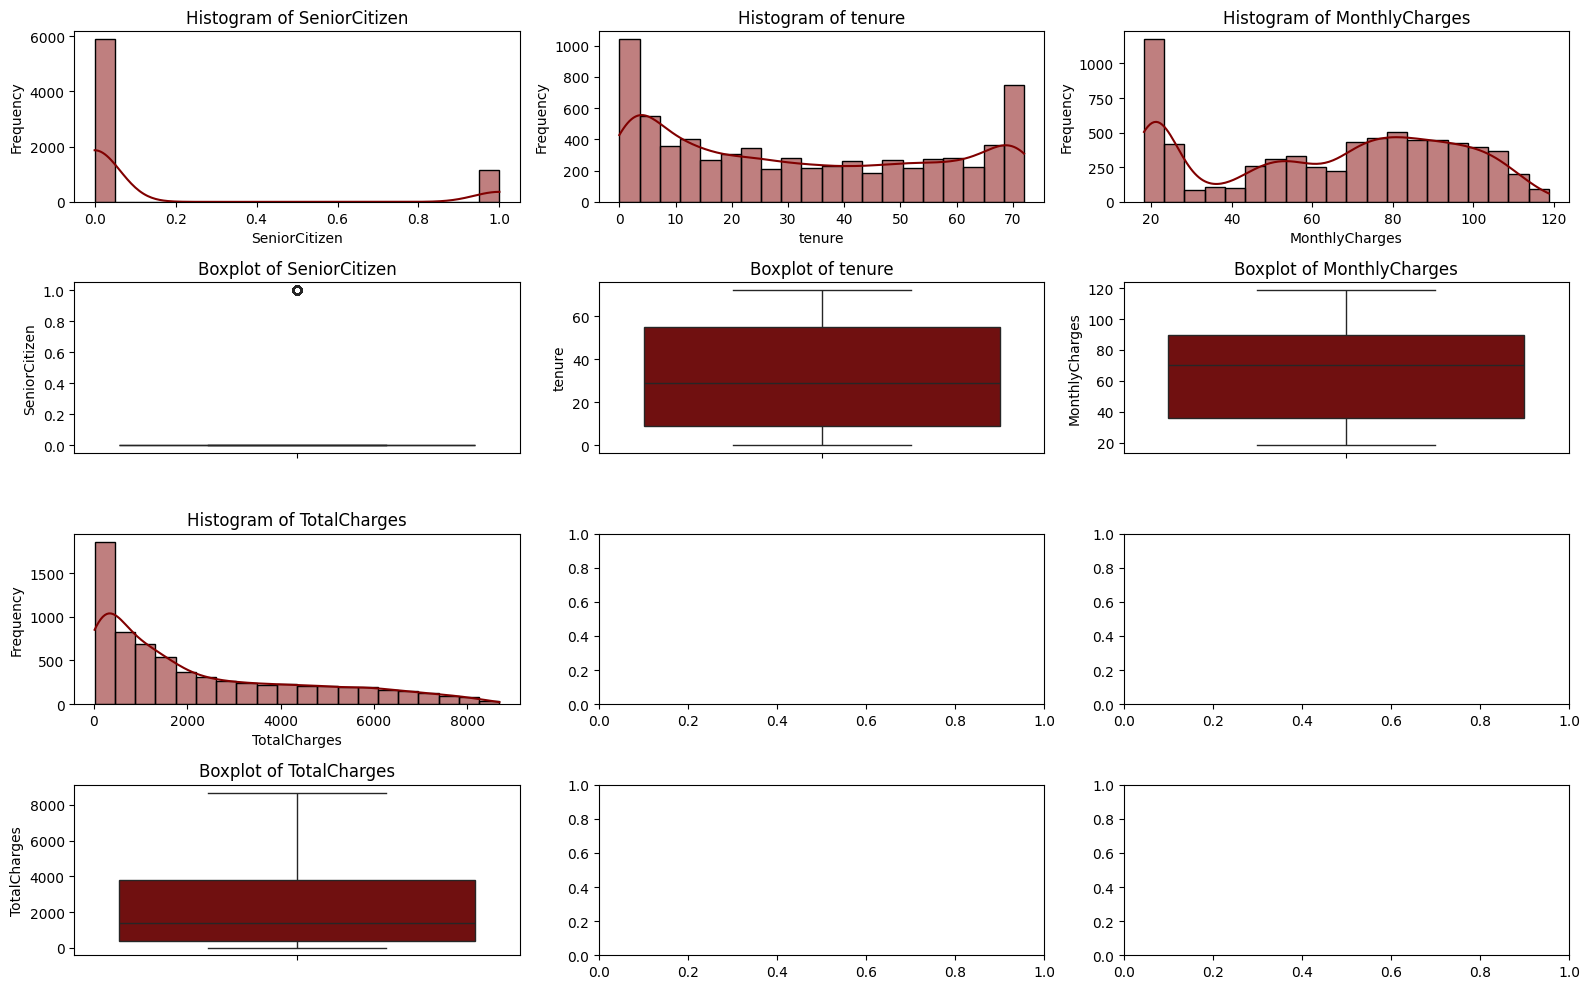

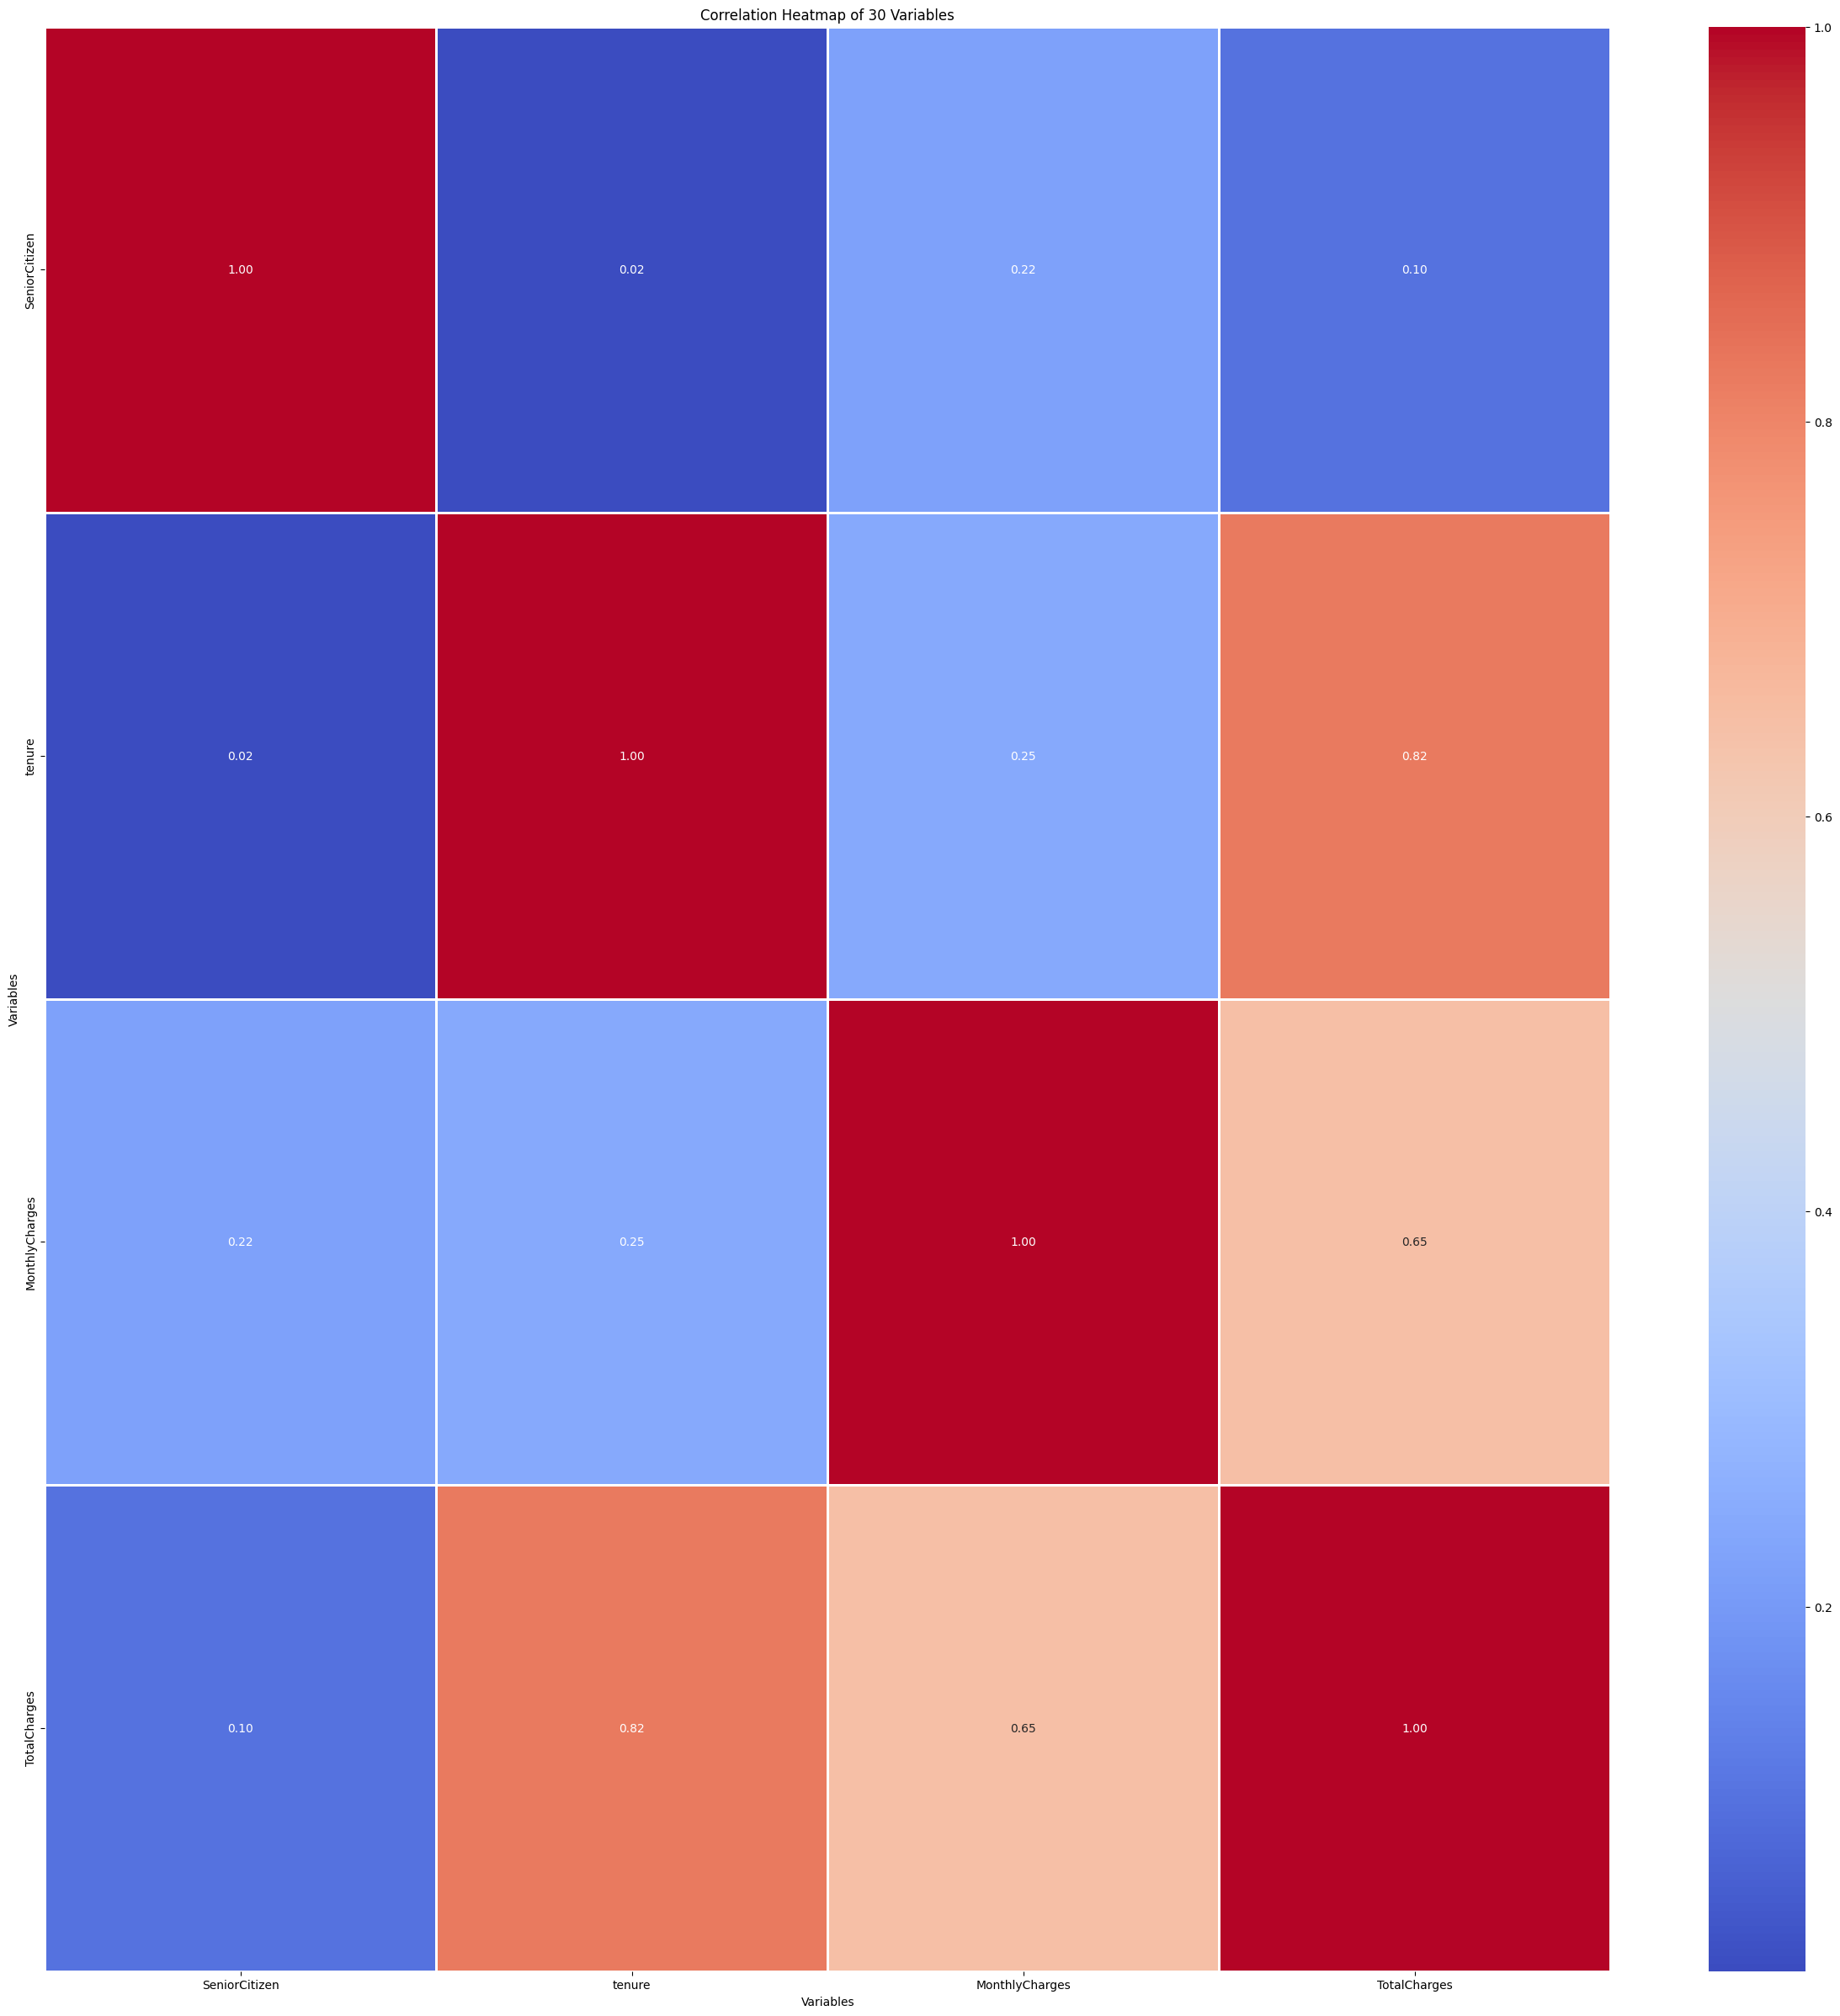

In [30]:
eda(churn)

In [31]:
#churnf is the dataframe with selected features
churnf=churn.drop(columns=['TotalCharges',"MultipleLines",'OnlineBackup'])

In [32]:

columns=['gender','PaymentMethod','MultipleLines','PhoneService', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling']
one_hot_df = pd.get_dummies(churn, columns=columns,dtype=int)

In [33]:
one_hot_df.drop(columns=['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],inplace=True)

In [34]:
columns=['gender','PaymentMethod','PhoneService', 'InternetService', 'OnlineSecurity',
        'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling']
one_hot_dff = pd.get_dummies(churnf, columns=columns,dtype=int)

In [35]:
one_hot_dff.drop(columns=['OnlineSecurity_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],inplace=True)

In [36]:
churn=encode_numerical_features(one_hot_df)

Encoding mapping for Partner:
  No -> 0
  Yes -> 1
Encoding mapping for Dependents:
  No -> 0
  Yes -> 1
Encoding mapping for Churn:
  No -> 0
  Yes -> 1


In [37]:
churnf=encode_numerical_features(one_hot_dff)

Encoding mapping for Partner:
  No -> 0
  Yes -> 1
Encoding mapping for Dependents:
  No -> 0
  Yes -> 1
Encoding mapping for Churn:
  No -> 0
  Yes -> 1


In [38]:
churn=z_score_normalize_n(churn)

In [39]:
churnf=z_score_normalize_n(churnf)

## Experiment no 1: Using all features and cv

In [40]:
X = churn.drop('Churn', axis=1)
y = churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


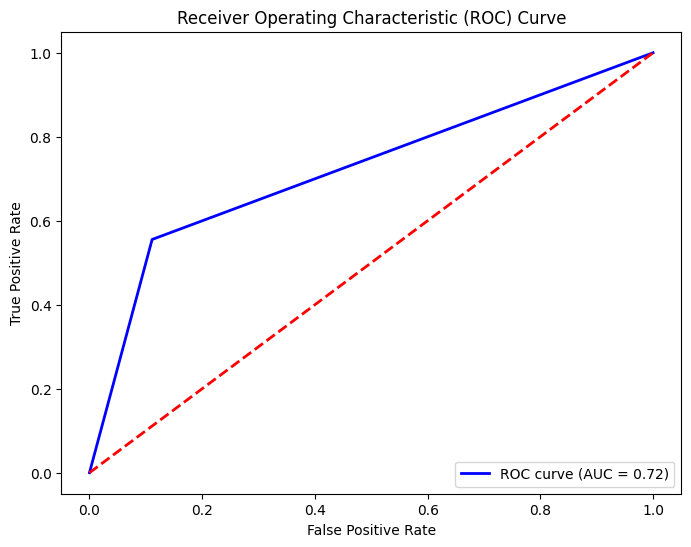

Confusion Matrix:
[[1383  173]
 [ 245  306]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.56      0.59       551

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.80      2107



In [41]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'None')

In [42]:
from tabulate import tabulate

# Assuming `results_df` is your DataFrame
print(tabulate(results_df, headers='keys', tablefmt='pipe'))

|    | Balancing Technique   | Model Name           |   Accuracy |   Precision |   Recall |   AUC_ROCcurve |
|---:|:----------------------|:---------------------|-----------:|------------:|---------:|---------------:|
|  0 | None                  | LogisticRegression() |   0.801614 |    0.638831 | 0.555354 |       0.722086 |


In [43]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.55376344 0.57681941 0.5309973  0.55795148 0.53763441]


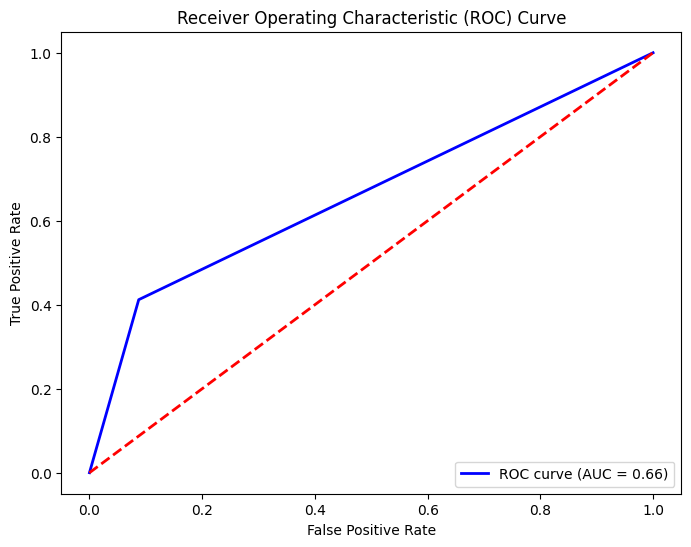

Confusion Matrix:
[[1420  136]
 [ 324  227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1556
           1       0.63      0.41      0.50       551

    accuracy                           0.78      2107
   macro avg       0.72      0.66      0.68      2107
weighted avg       0.76      0.78      0.77      2107



In [44]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'None')

In [45]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.44623656 0.44743935 0.40700809 0.40431267 0.43010753]


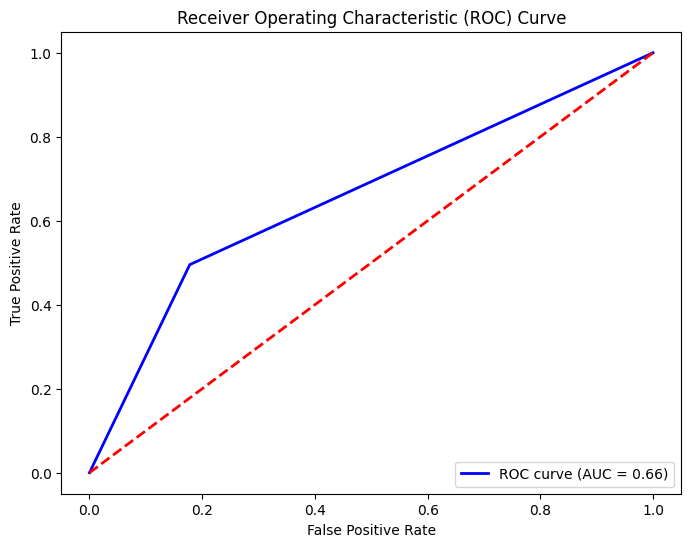

Confusion Matrix:
[[1279  277]
 [ 278  273]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1556
           1       0.50      0.50      0.50       551

    accuracy                           0.74      2107
   macro avg       0.66      0.66      0.66      2107
weighted avg       0.74      0.74      0.74      2107



In [46]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'None')

In [47]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.47580645 0.53638814 0.52021563 0.44474394 0.51344086]


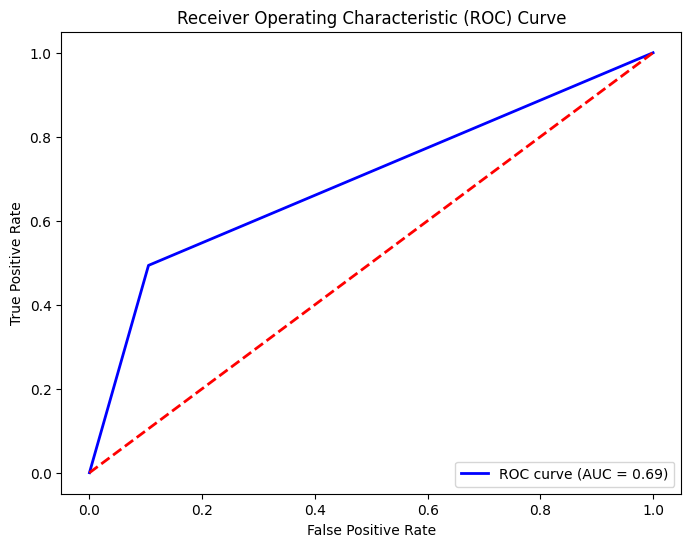

Confusion Matrix:
[[1393  163]
 [ 279  272]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1556
           1       0.63      0.49      0.55       551

    accuracy                           0.79      2107
   macro avg       0.73      0.69      0.71      2107
weighted avg       0.78      0.79      0.78      2107



In [48]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'None')

In [49]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.49193548 0.49326146 0.44743935 0.47708895 0.49193548]


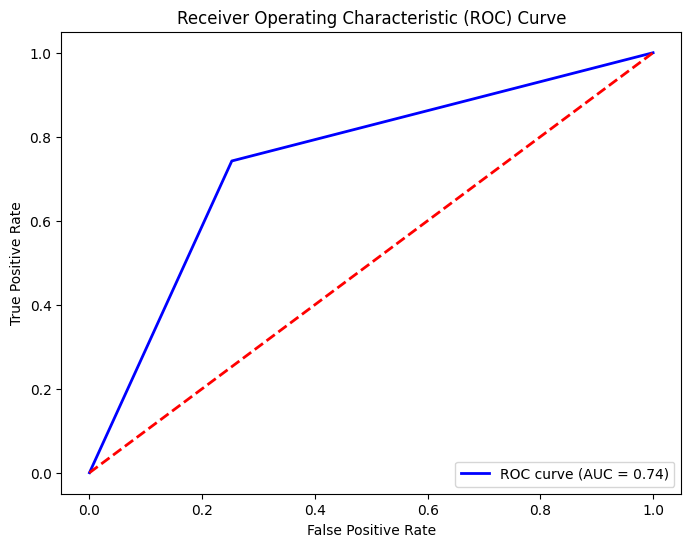

Confusion Matrix:
[[1163  393]
 [ 142  409]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1556
           1       0.51      0.74      0.60       551

    accuracy                           0.75      2107
   macro avg       0.70      0.74      0.71      2107
weighted avg       0.79      0.75      0.76      2107



In [50]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'None')

In [51]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.78494624 0.7574124  0.75202156 0.73315364 0.72043011]


In [52]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+---------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|   | Balancing Technique |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+---+---------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0 |        None         |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1 |        None         |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2 |        None         | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3 |        None         | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364791288566245 | 0.6944460644119829 |
| 4 |        

## Experiment no 2: Using Feature Selection and CV

In [53]:
X = churn.drop('Churn', axis=1)
y = churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


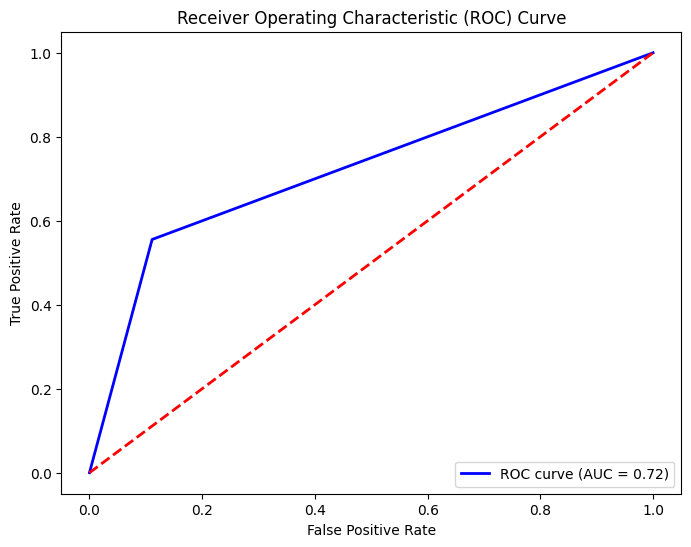

Confusion Matrix:
[[1383  173]
 [ 245  306]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.56      0.59       551

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.80      2107



In [54]:
warnings.filterwarnings("ignore")

apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'with feature selection')

In [55]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.55376344 0.57681941 0.5309973  0.55795148 0.53763441]


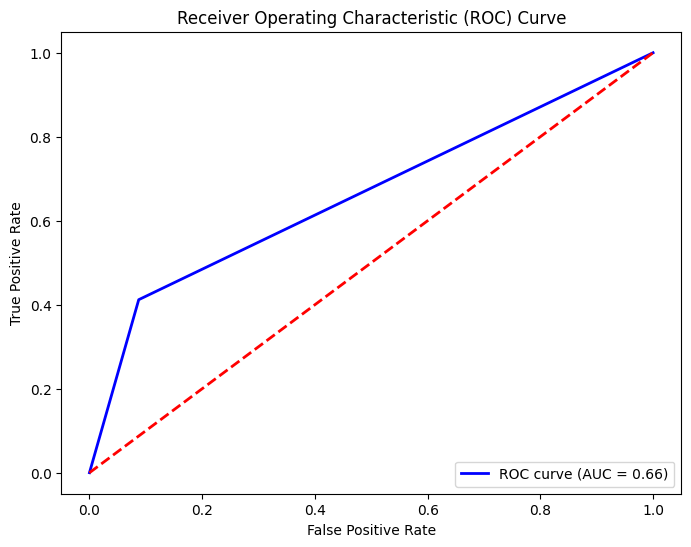

Confusion Matrix:
[[1420  136]
 [ 324  227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1556
           1       0.63      0.41      0.50       551

    accuracy                           0.78      2107
   macro avg       0.72      0.66      0.68      2107
weighted avg       0.76      0.78      0.77      2107



In [56]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'with feature selection')

In [57]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.44623656 0.44743935 0.40700809 0.40431267 0.43010753]


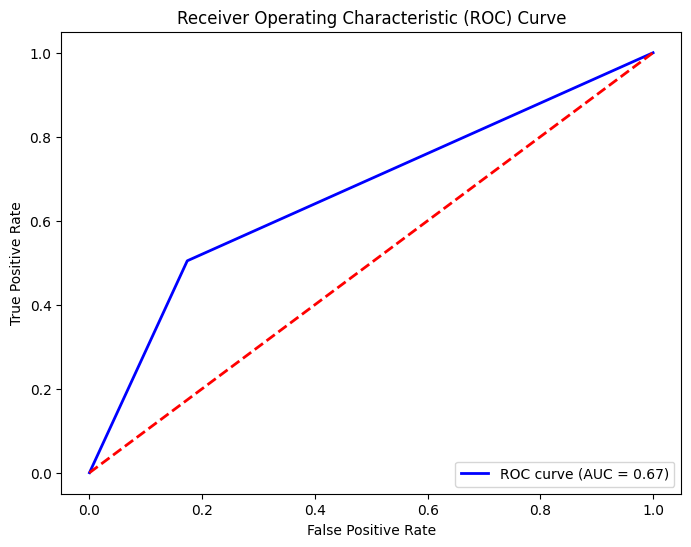

Confusion Matrix:
[[1286  270]
 [ 273  278]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1556
           1       0.51      0.50      0.51       551

    accuracy                           0.74      2107
   macro avg       0.67      0.67      0.67      2107
weighted avg       0.74      0.74      0.74      2107



In [58]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'with feature selection')

In [59]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.4811828  0.5309973  0.51752022 0.45013477 0.53225806]


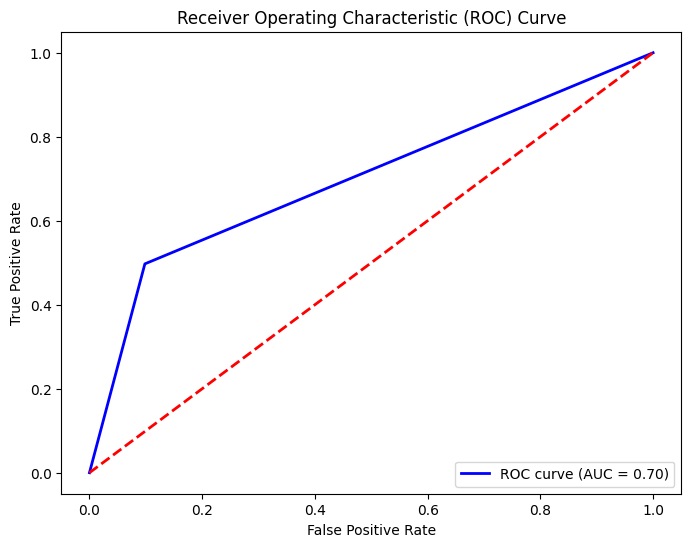

Confusion Matrix:
[[1403  153]
 [ 277  274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1556
           1       0.64      0.50      0.56       551

    accuracy                           0.80      2107
   macro avg       0.74      0.70      0.71      2107
weighted avg       0.78      0.80      0.79      2107



In [60]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'with feature selection')

In [61]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.48924731 0.47978437 0.46361186 0.47169811 0.49731183]


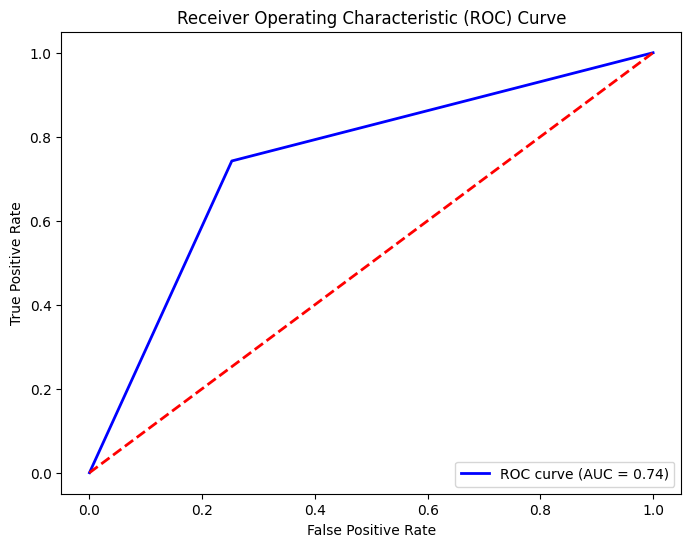

Confusion Matrix:
[[1163  393]
 [ 142  409]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1556
           1       0.51      0.74      0.60       551

    accuracy                           0.75      2107
   macro avg       0.70      0.74      0.71      2107
weighted avg       0.79      0.75      0.76      2107



In [62]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'with feature selection')

In [63]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.78494624 0.7574124  0.75202156 0.73315364 0.72043011]


In [64]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|   |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+---+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0 |          None          |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1 |          None          |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2 |          None          | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3 |          None          | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364791288566245 | 0.69444606441

## Experiment no 3:Resampling by SMOTE(train_data) with and without cv

In [65]:
# Split dataset into train and test
X = churnf.drop('Churn', axis=1)
y = churnf['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

churnf_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)


churnf_train=apply_smote(churnf_train, 'Churn')
churnf_train.to_csv('churnf_balanced_smote_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file

In [66]:
value_counts = churnf_train['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 3608
Category value 1: Number of occurrences: 3608


In [67]:
churnf_train=dealing_with_duplicates(churnf_train)
X = churnf_train.drop('Churn', axis=1)
y = churnf_train['Churn']

Number of duplicate rows in your data set: 8
All the duplicate rows have been deleted from data set


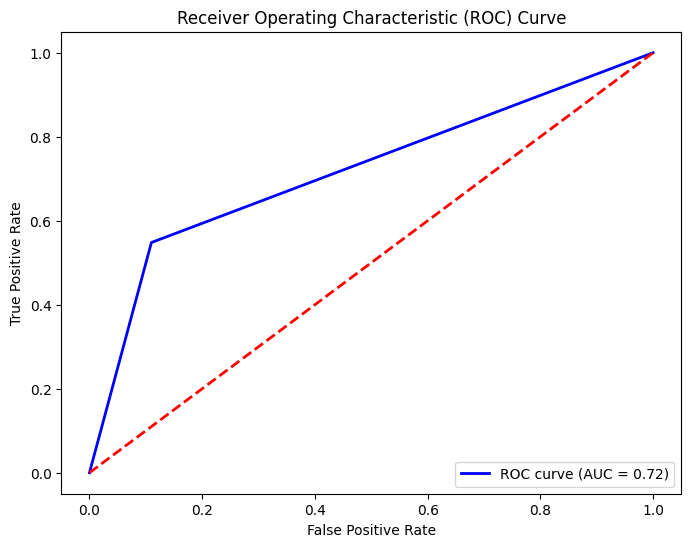

Confusion Matrix:
[[1385  171]
 [ 249  302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.59       551

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.80      2107



In [68]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'SMOTE(train_data)')

In [69]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.60138889 0.66990291 0.9445215  0.93055556 0.95277778]


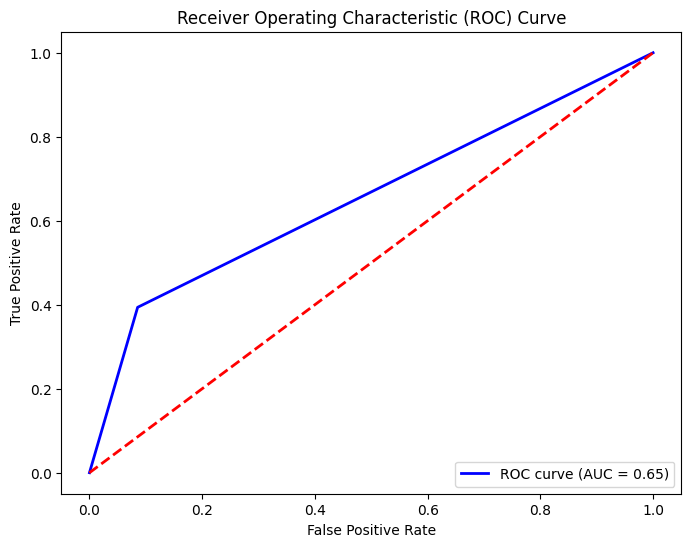

Confusion Matrix:
[[1423  133]
 [ 334  217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1556
           1       0.62      0.39      0.48       551

    accuracy                           0.78      2107
   macro avg       0.71      0.65      0.67      2107
weighted avg       0.76      0.78      0.76      2107



In [70]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'SMOTE(train_data)')

In [71]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.75972222 0.79195562 0.81969487 0.825      0.82361111]


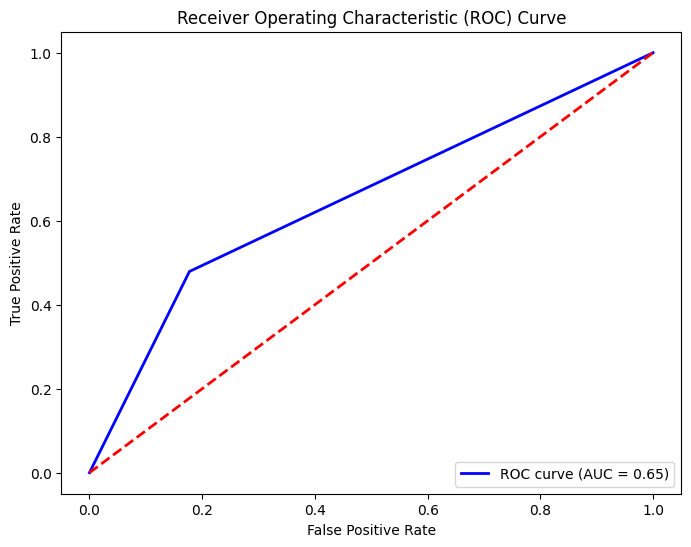

Confusion Matrix:
[[1280  276]
 [ 287  264]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1556
           1       0.49      0.48      0.48       551

    accuracy                           0.73      2107
   macro avg       0.65      0.65      0.65      2107
weighted avg       0.73      0.73      0.73      2107



In [72]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'SMOTE(train_data)')

In [73]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.57638889 0.66158114 0.91400832 0.925      0.91944444]


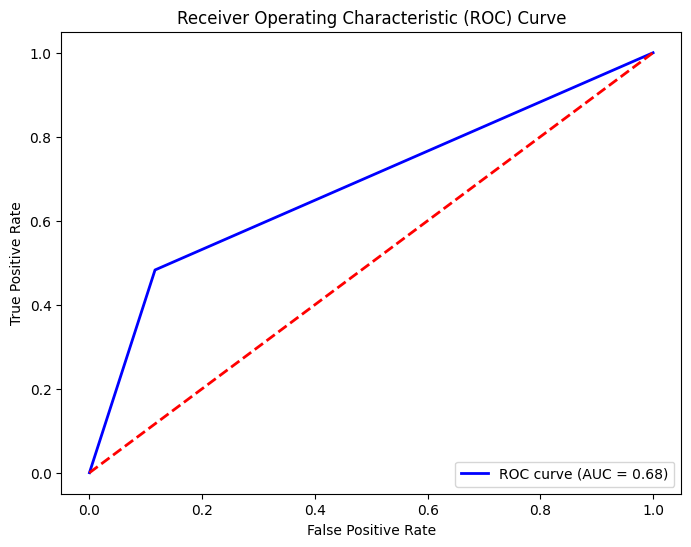

Confusion Matrix:
[[1375  181]
 [ 285  266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1556
           1       0.60      0.48      0.53       551

    accuracy                           0.78      2107
   macro avg       0.71      0.68      0.69      2107
weighted avg       0.77      0.78      0.77      2107



In [74]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'SMOTE(train_data)')

In [75]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.59722222 0.67961165 0.97919556 0.975      0.98611111]


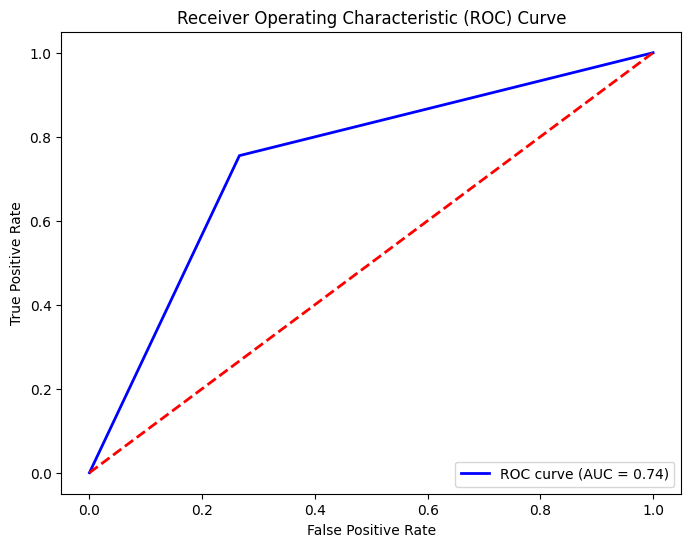

Confusion Matrix:
[[1142  414]
 [ 135  416]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.81      1556
           1       0.50      0.75      0.60       551

    accuracy                           0.74      2107
   macro avg       0.70      0.74      0.70      2107
weighted avg       0.79      0.74      0.75      2107



In [76]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'SMOTE(train_data)')

In [77]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.77222222 0.76699029 0.83356449 0.83888889 0.82777778]


In [78]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |          None          |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2  |          None          | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3  |          None          | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364791288566245 | 0.6944

## Experiment no 4:Resampling by SMOTE (whole_data) with and without cv

In [79]:
# Split dataset into train and test
churnf_smote=apply_smote(churnf, 'Churn')
churnf_smote.to_csv('churnf_smote_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file




In [80]:
value_counts = churnf_smote['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 5164
Category value 1: Number of occurrences: 5164


In [81]:
churnf_smote=dealing_with_duplicates(churnf_smote)


X = churnf_smote.drop('Churn', axis=1)
y = churnf_smote['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 12
All the duplicate rows have been deleted from data set


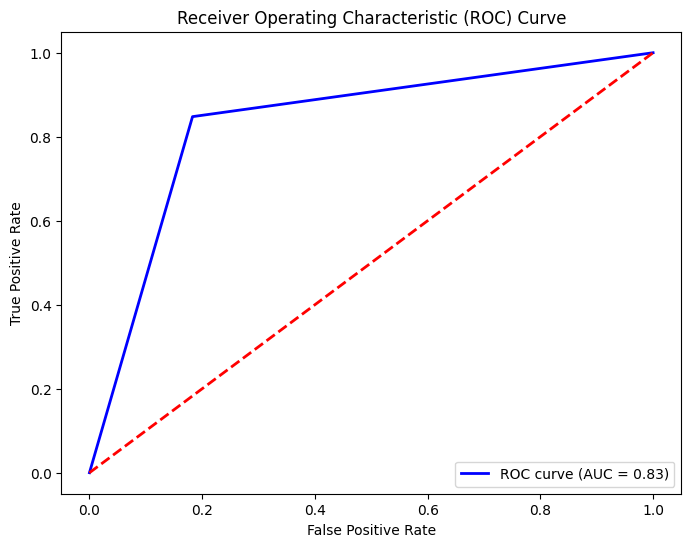

Confusion Matrix:
[[1278  286]
 [ 233 1298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1564
           1       0.82      0.85      0.83      1531

    accuracy                           0.83      3095
   macro avg       0.83      0.83      0.83      3095
weighted avg       0.83      0.83      0.83      3095



In [82]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'SMOTE(whole_data)')

In [83]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.59786822 0.69350145 0.91949564 0.94374394 0.92926357]


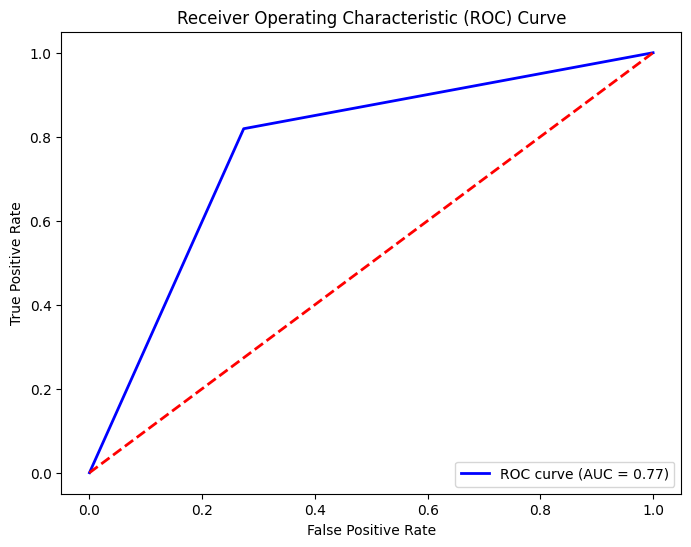

Confusion Matrix:
[[1136  428]
 [ 277 1254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1564
           1       0.75      0.82      0.78      1531

    accuracy                           0.77      3095
   macro avg       0.77      0.77      0.77      3095
weighted avg       0.78      0.77      0.77      3095



In [84]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'SMOTE(whole_data)')

In [85]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79166667 0.77982541 0.84869059 0.84675073 0.84593023]


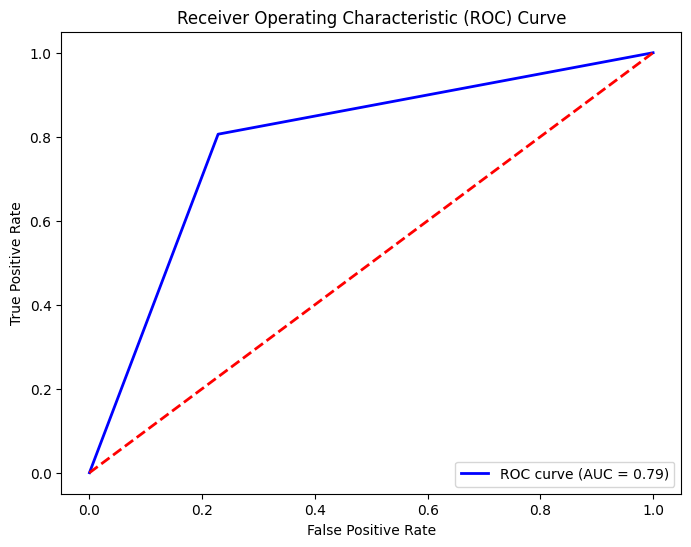

Confusion Matrix:
[[1207  357]
 [ 297 1234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1564
           1       0.78      0.81      0.79      1531

    accuracy                           0.79      3095
   macro avg       0.79      0.79      0.79      3095
weighted avg       0.79      0.79      0.79      3095



In [86]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'SMOTE(whole_data)')

In [87]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.60077519 0.64015519 0.93113482 0.91464597 0.90116279]


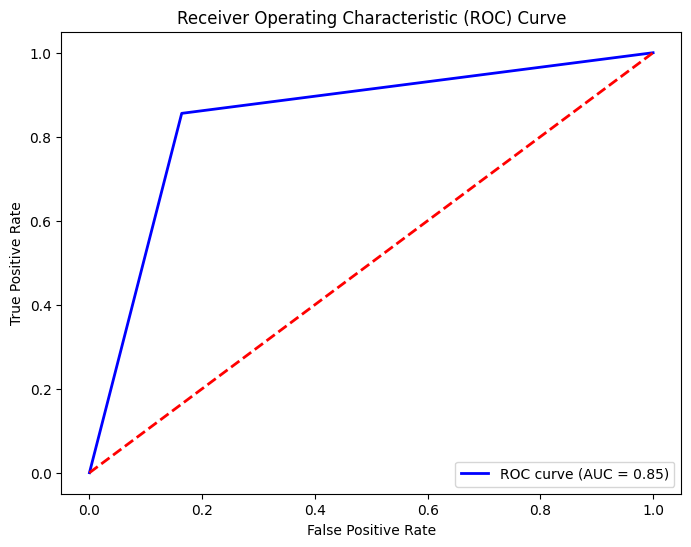

Confusion Matrix:
[[1308  256]
 [ 221 1310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1564
           1       0.84      0.86      0.85      1531

    accuracy                           0.85      3095
   macro avg       0.85      0.85      0.85      3095
weighted avg       0.85      0.85      0.85      3095



In [88]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'SMOTE(whole_data)')

In [89]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.61434109 0.67216295 0.9728419  0.98448109 0.97383721]


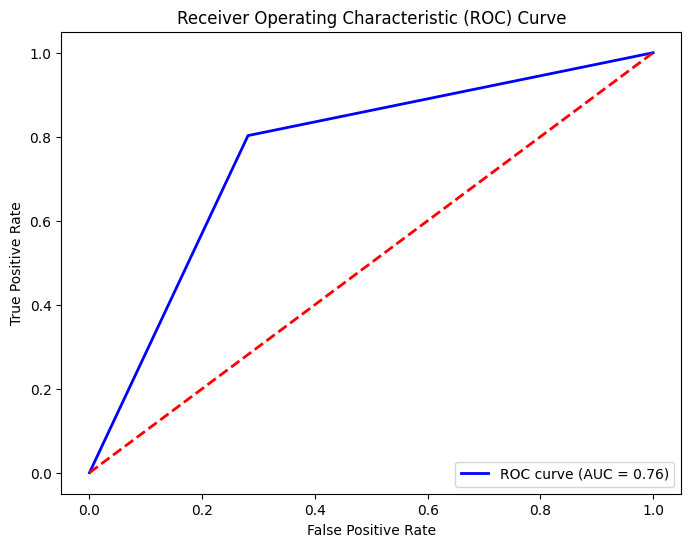

Confusion Matrix:
[[1124  440]
 [ 302 1229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1564
           1       0.74      0.80      0.77      1531

    accuracy                           0.76      3095
   macro avg       0.76      0.76      0.76      3095
weighted avg       0.76      0.76      0.76      3095



In [90]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'SMOTE(whole_data)')

In [91]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79069767 0.75169738 0.81959263 0.82444229 0.82945736]


In [92]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |          None          |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2  |          None          | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3  |          None          | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364791288566245 | 0.6944

## Experiment no 5:Resampling by Adasyn(train_data)

In [93]:
# Split dataset into train and test
X = churnf.drop('Churn', axis=1)
y = churnf['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

churnf_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)


churnf_train=apply_adasyn(churnf_train, 'Churn')
churnf_train.to_csv('churnf_adasyn_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [94]:
value_counts = churnf_train['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 3608
Category value 1: Number of occurrences: 3526


In [95]:
churnf_train=dealing_with_duplicates(churnf_train)
X = churnf_train.drop('Churn', axis=1)
y = churnf_train['Churn']

Number of duplicate rows in your data set: 6
All the duplicate rows have been deleted from data set


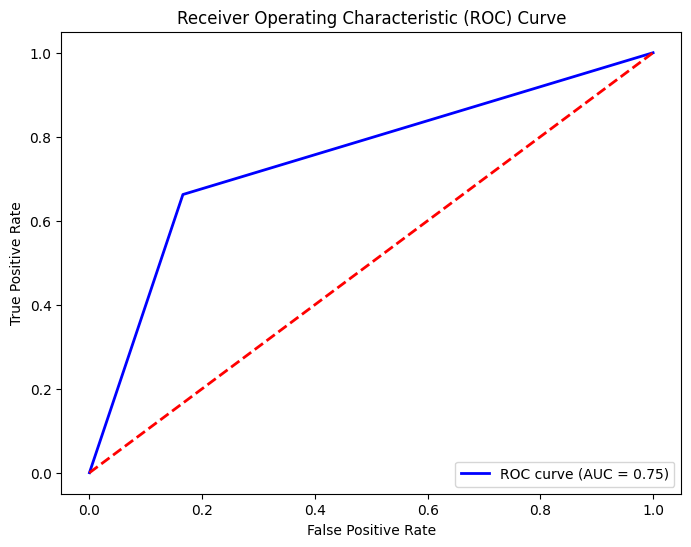

Confusion Matrix:
[[1298  258]
 [ 186  365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1556
           1       0.59      0.66      0.62       551

    accuracy                           0.79      2107
   macro avg       0.73      0.75      0.74      2107
weighted avg       0.80      0.79      0.79      2107



In [96]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, LogisticRegression(), 'ADASYN(train_data)')

In [97]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.55539773 0.62836879 0.90780142 0.94886364 0.91335227]


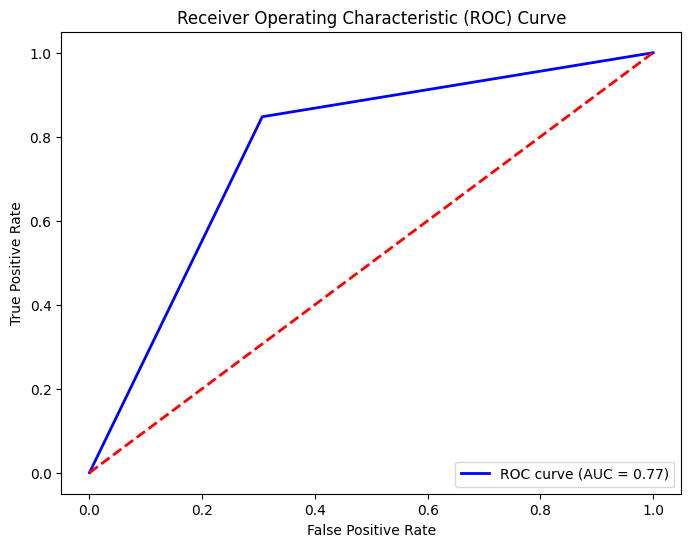

Confusion Matrix:
[[1079  477]
 [  84  467]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1556
           1       0.49      0.85      0.62       551

    accuracy                           0.73      2107
   macro avg       0.71      0.77      0.71      2107
weighted avg       0.81      0.73      0.75      2107



In [98]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, SVC(), 'ADASYN(train_data)')

In [99]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.81818182 0.84680851 0.75177305 0.79261364 0.79403409]


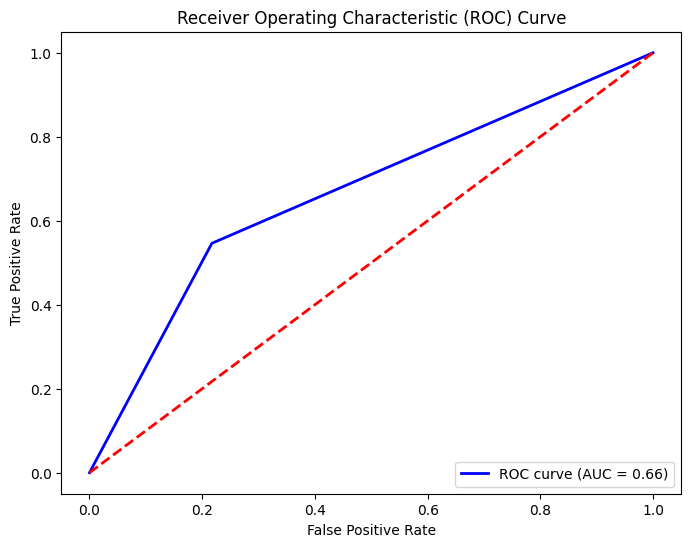

Confusion Matrix:
[[1218  338]
 [ 250  301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1556
           1       0.47      0.55      0.51       551

    accuracy                           0.72      2107
   macro avg       0.65      0.66      0.66      2107
weighted avg       0.74      0.72      0.73      2107



In [100]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, DecisionTreeClassifier(), 'ADASYN(train_data)')

In [101]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.53125    0.63120567 0.90496454 0.89346591 0.89772727]


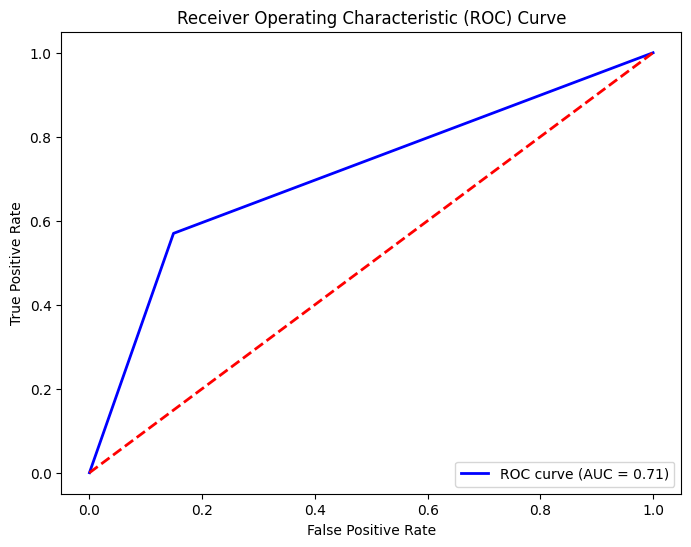

Confusion Matrix:
[[1324  232]
 [ 237  314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1556
           1       0.58      0.57      0.57       551

    accuracy                           0.78      2107
   macro avg       0.71      0.71      0.71      2107
weighted avg       0.78      0.78      0.78      2107



In [102]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, RandomForestClassifier(), 'ADASYN(train_data)')

In [103]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.59232955 0.67092199 0.95744681 0.98153409 0.97159091]


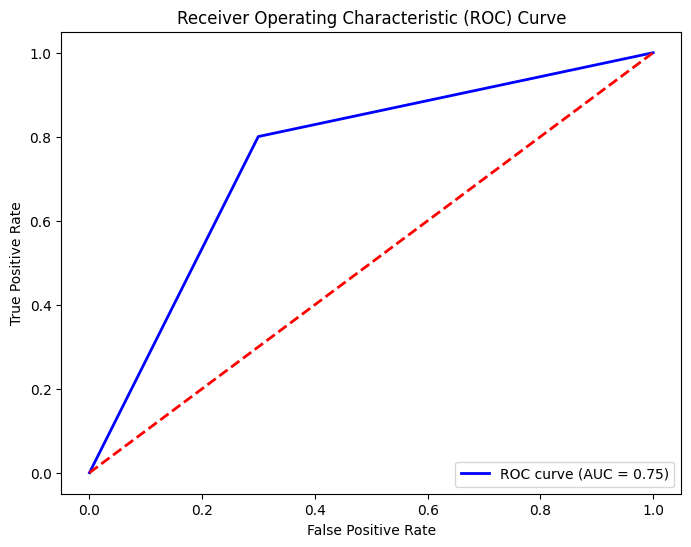

Confusion Matrix:
[[1090  466]
 [ 110  441]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1556
           1       0.49      0.80      0.60       551

    accuracy                           0.73      2107
   macro avg       0.70      0.75      0.70      2107
weighted avg       0.80      0.73      0.74      2107



In [104]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, BernoulliNB(), 'ADASYN(train_data)')

In [105]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79119318 0.80283688 0.70638298 0.78977273 0.72159091]


In [106]:
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |          None          |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2  |          None          | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3  |          None          | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364791288566245 | 0.6944

## Experiment no 6:Resampling by Adasyn (whole_data) with and without cv

In [107]:
# Split dataset into train and test
churnf_adasyn=apply_smote(churnf, 'Churn')
churnf_adasyn.to_csv('churnf_adasyn_wholedata.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file





In [108]:
value_counts = churnf_adasyn['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 5164
Category value 1: Number of occurrences: 5164


In [109]:
churnf_adasyn=dealing_with_duplicates(churnf_adasyn)


X = churnf_adasyn.drop('Churn', axis=1)
y = churnf_adasyn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 12
All the duplicate rows have been deleted from data set


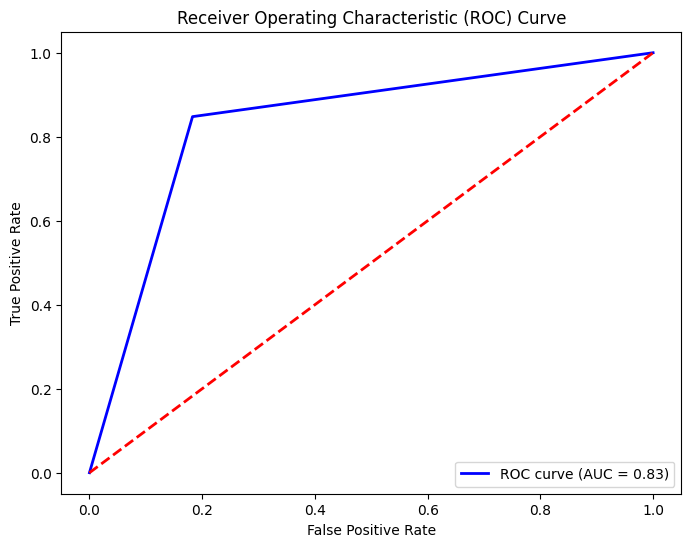

Confusion Matrix:
[[1278  286]
 [ 233 1298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1564
           1       0.82      0.85      0.83      1531

    accuracy                           0.83      3095
   macro avg       0.83      0.83      0.83      3095
weighted avg       0.83      0.83      0.83      3095



In [110]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'ADASYN(whole_data)')

In [111]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.59786822 0.69350145 0.91949564 0.94374394 0.92926357]


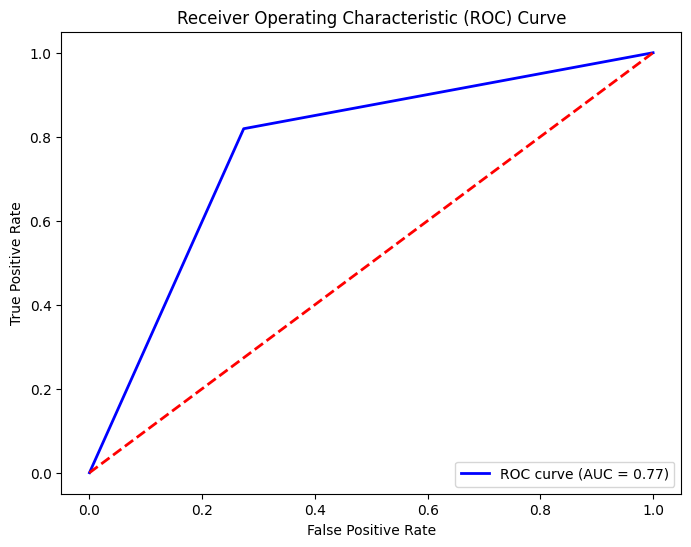

Confusion Matrix:
[[1136  428]
 [ 277 1254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1564
           1       0.75      0.82      0.78      1531

    accuracy                           0.77      3095
   macro avg       0.77      0.77      0.77      3095
weighted avg       0.78      0.77      0.77      3095



In [112]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'ADASYN(whole_data)')

In [113]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79166667 0.77982541 0.84869059 0.84675073 0.84593023]


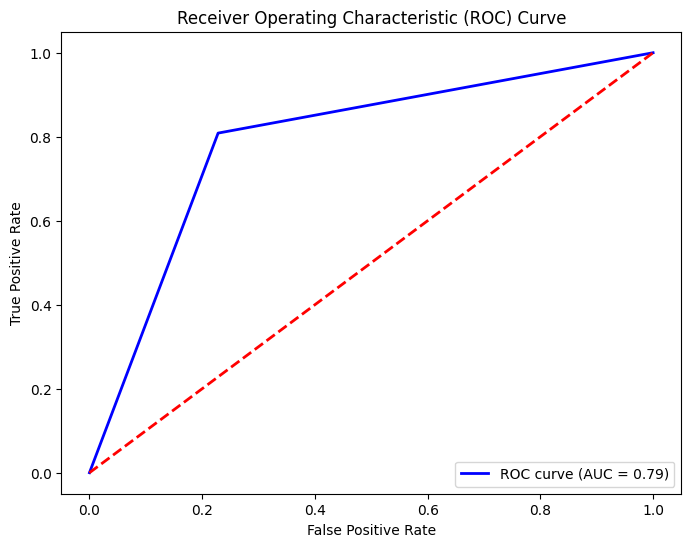

Confusion Matrix:
[[1207  357]
 [ 293 1238]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1564
           1       0.78      0.81      0.79      1531

    accuracy                           0.79      3095
   macro avg       0.79      0.79      0.79      3095
weighted avg       0.79      0.79      0.79      3095



In [115]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'ADASYN(whole_data)')

In [116]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.61434109 0.64985451 0.93501455 0.91076625 0.90406977]


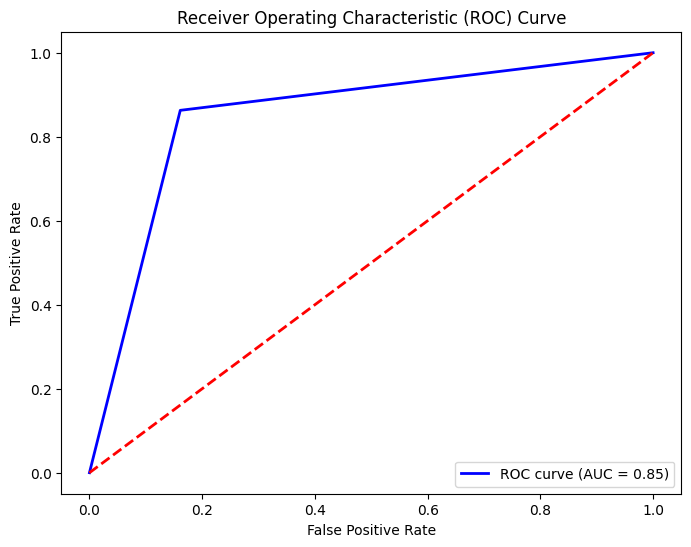

Confusion Matrix:
[[1312  252]
 [ 210 1321]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1564
           1       0.84      0.86      0.85      1531

    accuracy                           0.85      3095
   macro avg       0.85      0.85      0.85      3095
weighted avg       0.85      0.85      0.85      3095



In [117]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'ADASYN(whole_data)')

In [118]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.60852713 0.6614937  0.9728419  0.98545102 0.97383721]


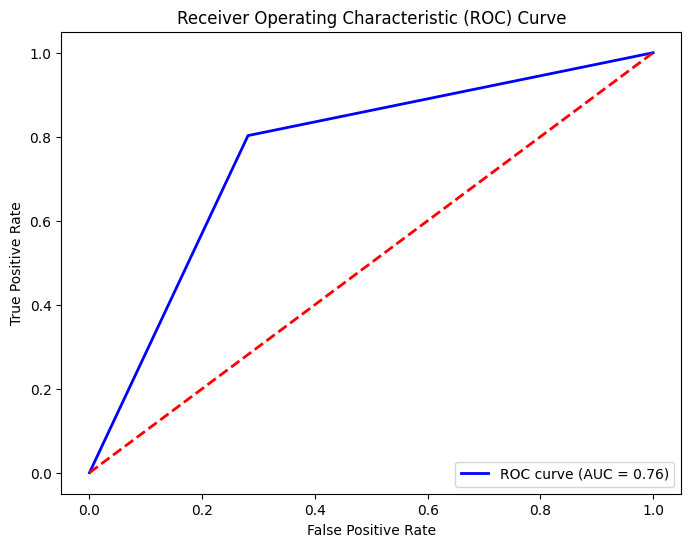

Confusion Matrix:
[[1124  440]
 [ 302 1229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1564
           1       0.74      0.80      0.77      1531

    accuracy                           0.76      3095
   macro avg       0.76      0.76      0.76      3095
weighted avg       0.76      0.76      0.76      3095



In [119]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'ADASYN(whole_data)')

In [120]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79069767 0.75169738 0.81959263 0.82444229 0.82945736]


In [121]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |  Balancing Technique   |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |          None          |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |          None          |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2  |          None          | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3  |          None          | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364791288566245 | 0.6944

## Experiment no 7:Resampling by Under Sampling(train_data):

In [122]:
# Split dataset into train and test
X = churnf.drop('Churn', axis=1)
y = churnf['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


X_train,y_train=apply_undersampling(X_train,y_train)
churnf_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
churnf_train.to_csv('churnf_undersampling_train.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [123]:
value_counts = churnf_train['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 1306
Category value 1: Number of occurrences: 1306


In [124]:
churnf_train=dealing_with_duplicates(churnf_train)
X = churnf_train.drop('Churn', axis=1)
y = churnf_train['Churn']

Number of duplicate rows in your data set: 0
All the duplicate rows have been deleted from data set


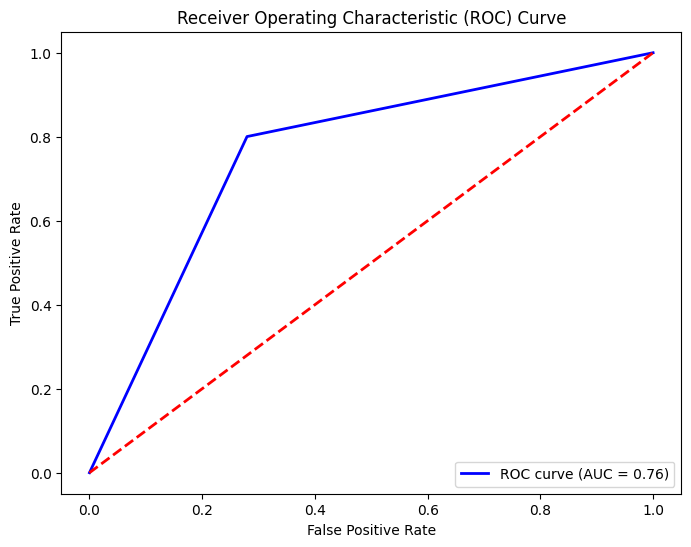

Confusion Matrix:
[[1121  435]
 [ 110  441]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1556
           1       0.50      0.80      0.62       551

    accuracy                           0.74      2107
   macro avg       0.71      0.76      0.71      2107
weighted avg       0.80      0.74      0.76      2107



In [125]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, LogisticRegression(), 'UnderSampling(train_data)')

In [126]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79693487 0.80534351 0.80842912 0.78927203 0.8045977 ]


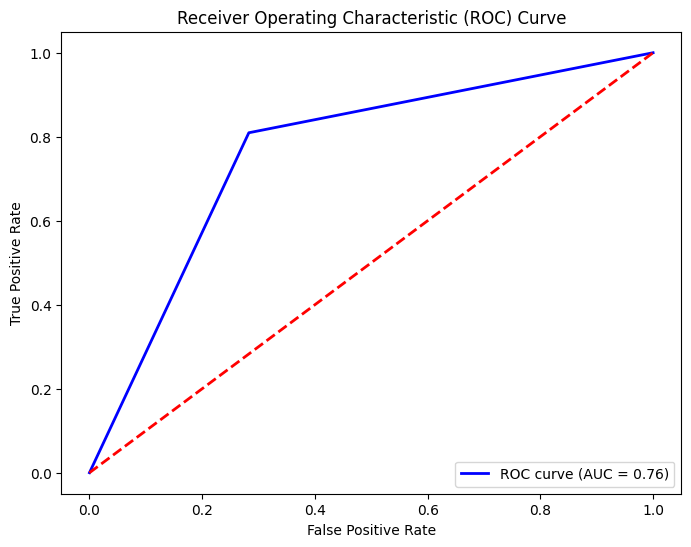

Confusion Matrix:
[[1116  440]
 [ 105  446]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1556
           1       0.50      0.81      0.62       551

    accuracy                           0.74      2107
   macro avg       0.71      0.76      0.71      2107
weighted avg       0.81      0.74      0.76      2107



In [127]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, SVC(), 'UnderSampling(train_data)')

In [128]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.76245211 0.77480916 0.75095785 0.78927203 0.78544061]


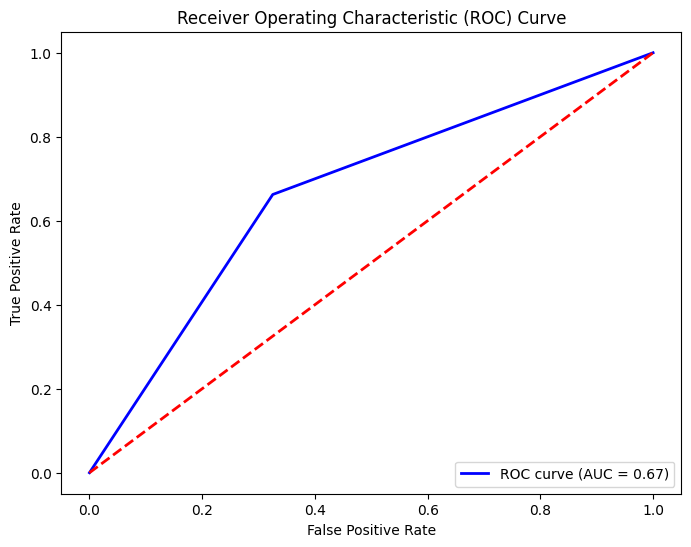

Confusion Matrix:
[[1050  506]
 [ 186  365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1556
           1       0.42      0.66      0.51       551

    accuracy                           0.67      2107
   macro avg       0.63      0.67      0.63      2107
weighted avg       0.74      0.67      0.69      2107



In [129]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, DecisionTreeClassifier(), 'UnderSampling(train_data)')

In [130]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.70881226 0.70610687 0.64367816 0.64750958 0.69731801]


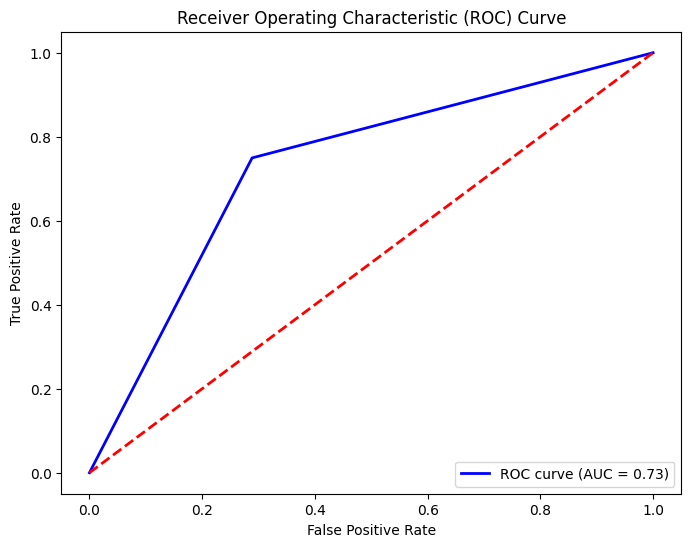

Confusion Matrix:
[[1107  449]
 [ 138  413]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1556
           1       0.48      0.75      0.58       551

    accuracy                           0.72      2107
   macro avg       0.68      0.73      0.69      2107
weighted avg       0.78      0.72      0.74      2107



In [131]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, RandomForestClassifier(), 'UnderSampling(train_data)')

In [132]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79310345 0.75572519 0.74329502 0.76245211 0.75095785]


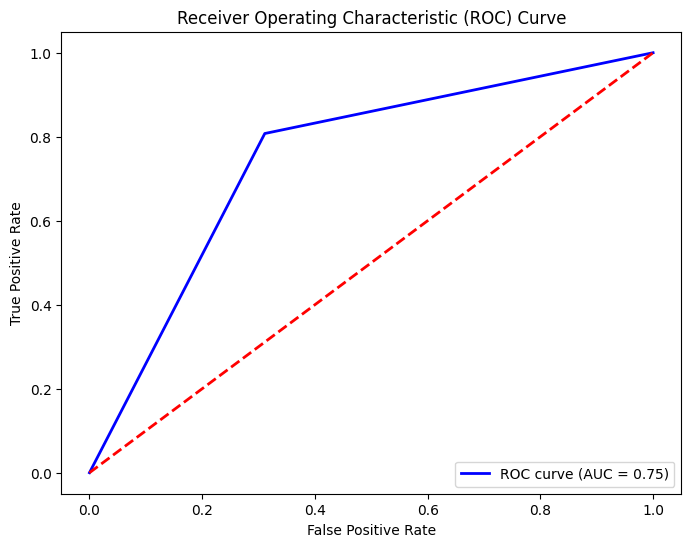

Confusion Matrix:
[[1072  484]
 [ 106  445]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1556
           1       0.48      0.81      0.60       551

    accuracy                           0.72      2107
   macro avg       0.69      0.75      0.69      2107
weighted avg       0.80      0.72      0.74      2107



In [133]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X, y, X_test, y_test, BernoulliNB(), 'UnderSampling(train_data)')

In [134]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.81226054 0.80534351 0.83141762 0.81609195 0.78927203]


In [135]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |    Balancing Technique    |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |           None            |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |           None            |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2  |           None            | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3  |           None            | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364

## Experiment no 8:Resampling by Undersampling (whole_data):

In [136]:
# Split dataset into train and test
X = churnf.drop('Churn', axis=1)
y = churnf['Churn']
X,y=apply_undersampling(X, y)


churnf_train = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
churnf_train.to_csv('churnf_undersampling_wholedata.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file


In [137]:
value_counts = churnf_train['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 1857
Category value 1: Number of occurrences: 1857


In [138]:
churn_train=dealing_with_duplicates(churnf_train)
X = churn_train.drop('Churn', axis=1)
y = churn_train['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


Number of duplicate rows in your data set: 0
All the duplicate rows have been deleted from data set


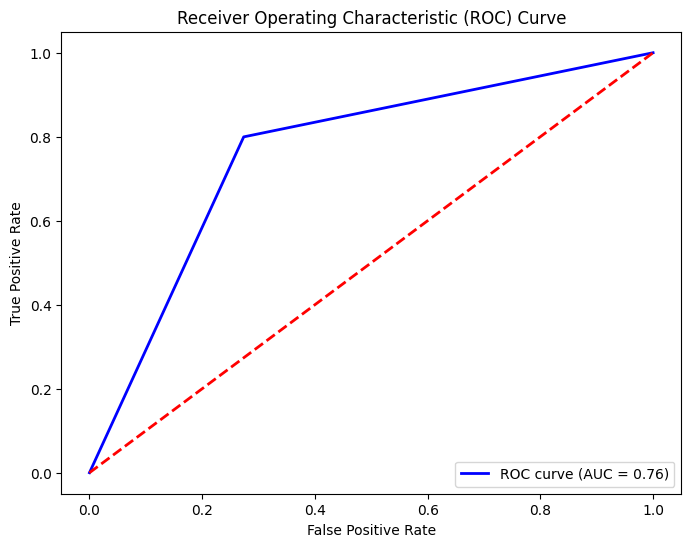

Confusion Matrix:
[[422 159]
 [107 427]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       581
           1       0.73      0.80      0.76       534

    accuracy                           0.76      1115
   macro avg       0.76      0.76      0.76      1115
weighted avg       0.76      0.76      0.76      1115



In [139]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'UnderSampling(whole_data)')

In [140]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.83827493 0.81401617 0.79032258 0.77688172 0.74663073]


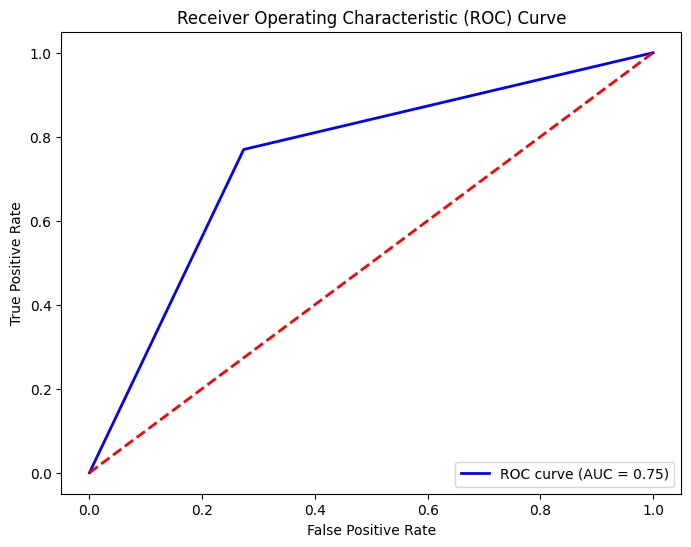

Confusion Matrix:
[[422 159]
 [123 411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       581
           1       0.72      0.77      0.74       534

    accuracy                           0.75      1115
   macro avg       0.75      0.75      0.75      1115
weighted avg       0.75      0.75      0.75      1115



In [141]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'UnderSampling(whole_data)')

In [142]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(SVC(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.81671159 0.77897574 0.80376344 0.76612903 0.75202156]


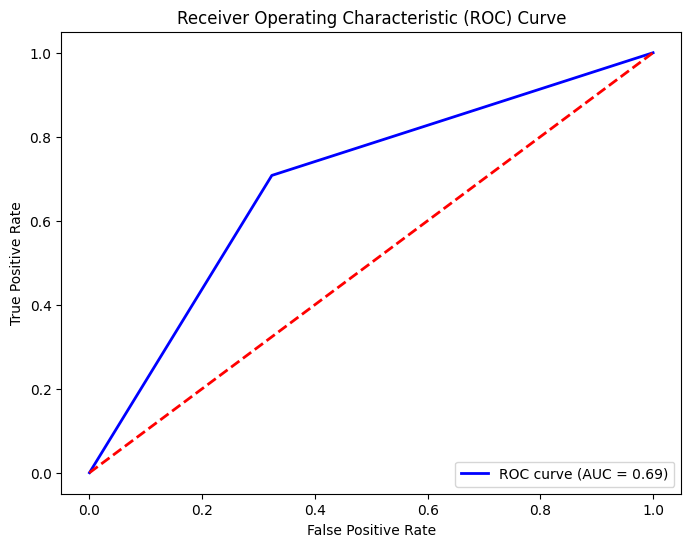

Confusion Matrix:
[[393 188]
 [156 378]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       581
           1       0.67      0.71      0.69       534

    accuracy                           0.69      1115
   macro avg       0.69      0.69      0.69      1115
weighted avg       0.69      0.69      0.69      1115



In [143]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'UnderSampling(whole_data)')

In [144]:
import warnings
warnings.filterwarnings("ignore")


cv_results = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.6819407  0.71698113 0.63172043 0.61827957 0.66576819]


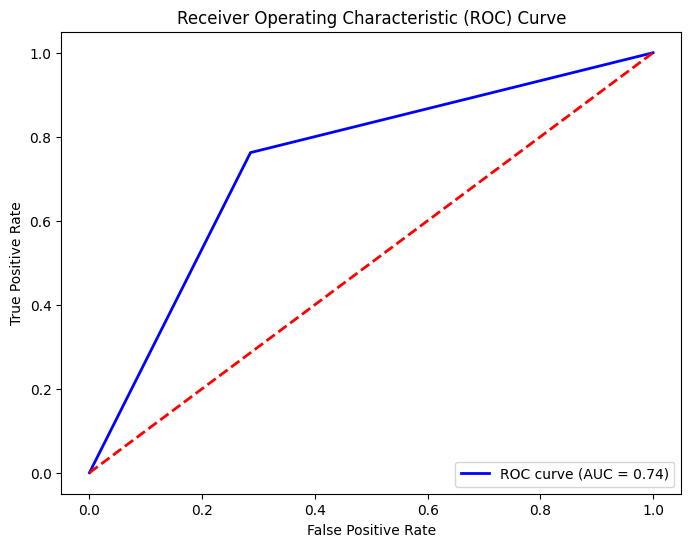

Confusion Matrix:
[[415 166]
 [127 407]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       581
           1       0.71      0.76      0.74       534

    accuracy                           0.74      1115
   macro avg       0.74      0.74      0.74      1115
weighted avg       0.74      0.74      0.74      1115



In [145]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'UnderSampling(whole_data)')

In [146]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.79784367 0.77088949 0.72580645 0.72311828 0.73854447]


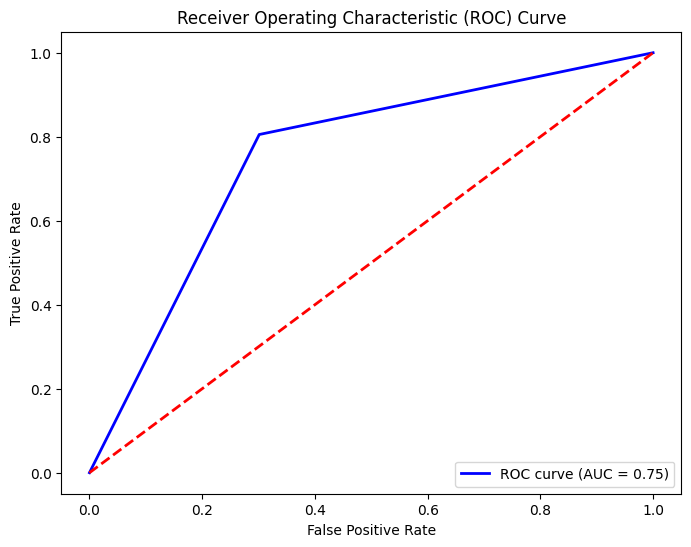

Confusion Matrix:
[[406 175]
 [104 430]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       581
           1       0.71      0.81      0.76       534

    accuracy                           0.75      1115
   macro avg       0.75      0.75      0.75      1115
weighted avg       0.76      0.75      0.75      1115



In [147]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'UnderSampling(whole_data)')

In [148]:

warnings.filterwarnings("ignore")


cv_results = cross_val_score(BernoulliNB(), X, y, cv=5, scoring='recall')
print(cv_results)

[0.8490566  0.8328841  0.79569892 0.78494624 0.7574124 ]


In [149]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
|    |    Balancing Technique    |        Model Name        |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------+--------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |           None            |   LogisticRegression()   | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |           None            |          SVC()           | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |
| 2  |           None            | DecisionTreeClassifier() | 0.736592311343142  | 0.49636363636363634 | 0.4954627949183303  | 0.6587211146828156 |
| 3  |           None            | RandomForestClassifier() | 0.7902230659705742 | 0.6252873563218391  | 0.49364

## Experiment 9: Algorithmic Method (Class weighting):

In [150]:
X = churnf.drop('Churn', axis=1)
y = churnf['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



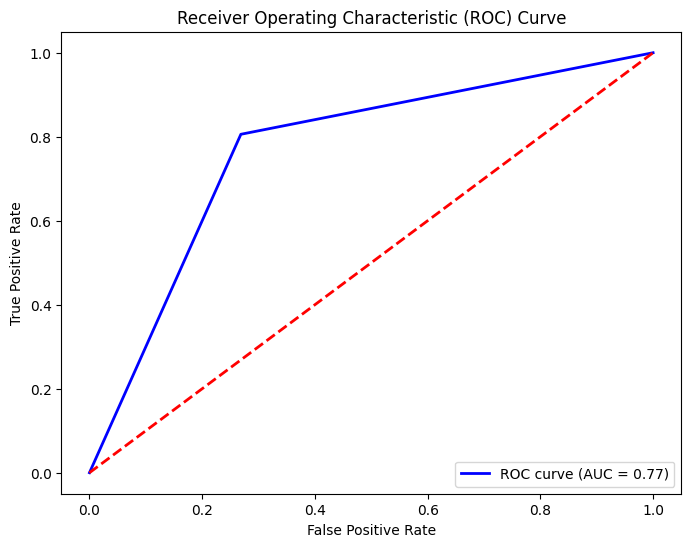

Confusion Matrix:
[[1138  418]
 [ 107  444]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1556
           1       0.52      0.81      0.63       551

    accuracy                           0.75      2107
   macro avg       0.71      0.77      0.72      2107
weighted avg       0.81      0.75      0.76      2107



In [151]:
apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

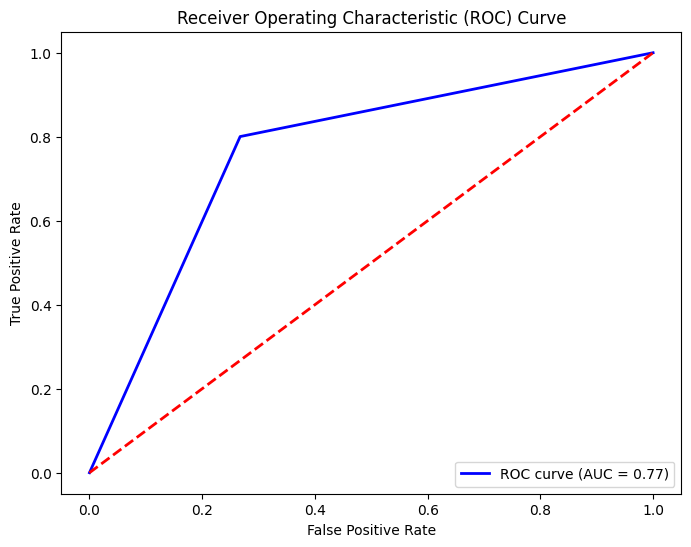

Confusion Matrix:
[[1140  416]
 [ 110  441]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1556
           1       0.51      0.80      0.63       551

    accuracy                           0.75      2107
   macro avg       0.71      0.77      0.72      2107
weighted avg       0.81      0.75      0.76      2107



In [152]:
apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

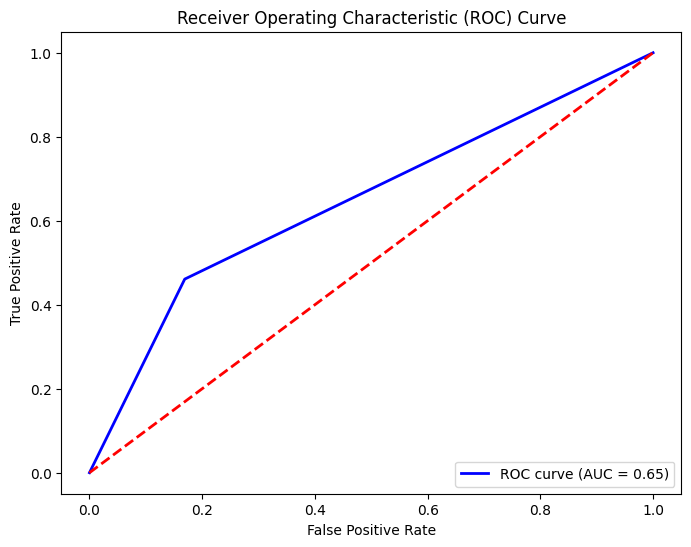

Confusion Matrix:
[[1293  263]
 [ 297  254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1556
           1       0.49      0.46      0.48       551

    accuracy                           0.73      2107
   macro avg       0.65      0.65      0.65      2107
weighted avg       0.73      0.73      0.73      2107



In [153]:
apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

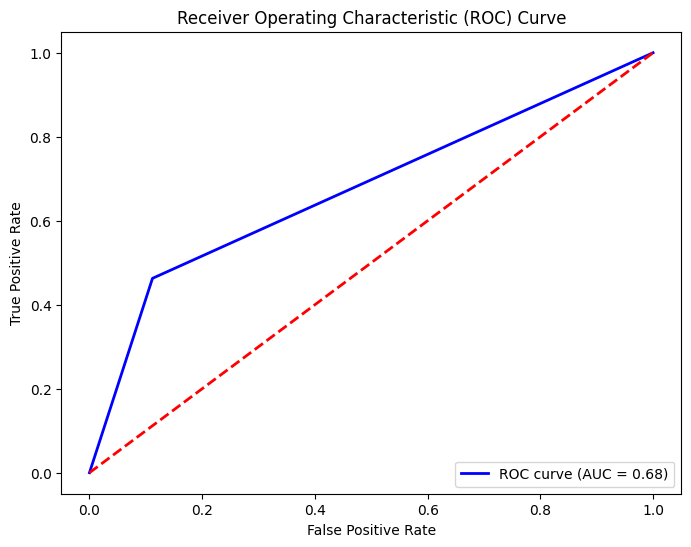

Confusion Matrix:
[[1382  174]
 [ 296  255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1556
           1       0.59      0.46      0.52       551

    accuracy                           0.78      2107
   macro avg       0.71      0.68      0.69      2107
weighted avg       0.76      0.78      0.77      2107



In [154]:
apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(class_weight='balanced', random_state=42), 'Class weightining(Algorithmic Method)')

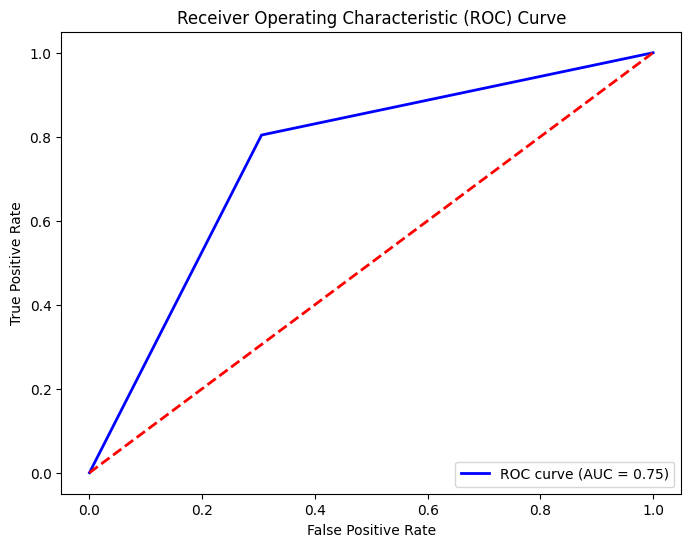

Confusion Matrix:
[[1081  475]
 [ 108  443]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1556
           1       0.48      0.80      0.60       551

    accuracy                           0.72      2107
   macro avg       0.70      0.75      0.70      2107
weighted avg       0.80      0.72      0.74      2107



In [155]:
apply_ML_algov3(X_train, y_train, X_test, y_test, BernoulliNB(class_prior=None), 'Class weightining(Algorithmic Method)')


In [156]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |                 None                  |                              SVC()                               | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |


## Experiment no 10: GAN(whole_data)

In [161]:
balanced_df = import_dataset(r'/content/balanced_dataset.xlsx')
balanced_df=dealing_with_duplicates(churnf)

Number of duplicate rows in your data set: 5
All the duplicate rows have been deleted from data set


In [162]:
# Split dataset into train and test
X = balanced_df.drop('Churn', axis=1)
y = balanced_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



In [163]:
value_counts = balanced_df['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Category value 0: Number of occurrences: 5159
Category value 1: Number of occurrences: 1857


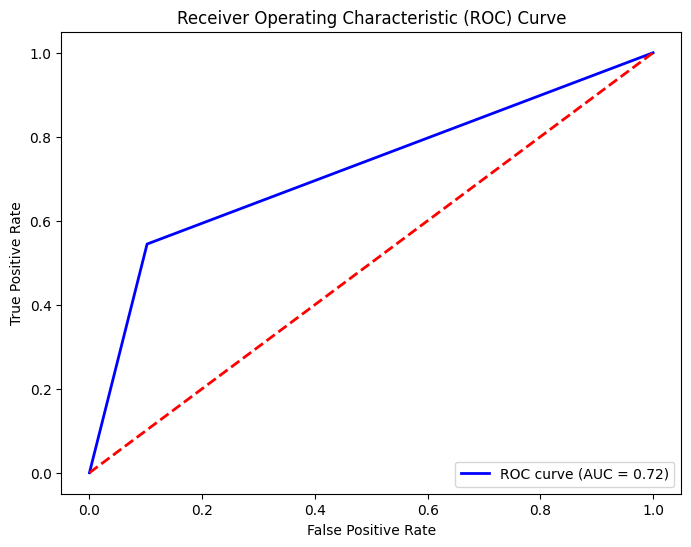

Confusion Matrix:
[[1405  160]
 [ 246  294]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1565
           1       0.65      0.54      0.59       540

    accuracy                           0.81      2105
   macro avg       0.75      0.72      0.73      2105
weighted avg       0.80      0.81      0.80      2105



In [164]:
warnings.filterwarnings("ignore")





apply_ML_algov2(X_train, y_train, X_test, y_test, LogisticRegression(), 'GAN(whole_data)')

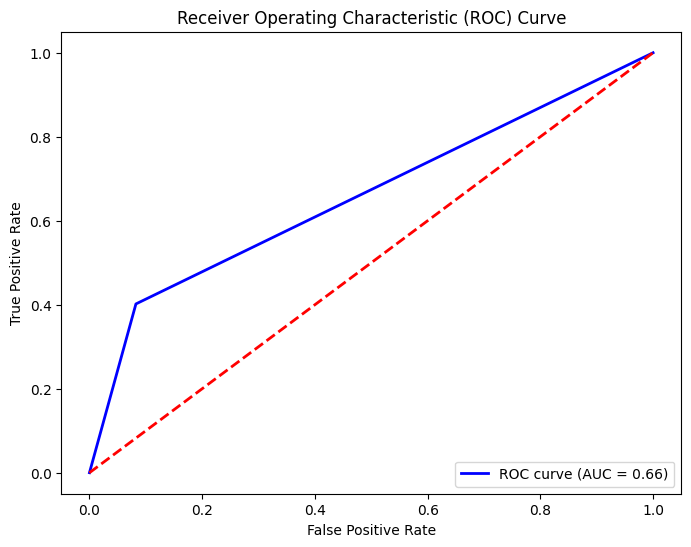

Confusion Matrix:
[[1436  129]
 [ 323  217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1565
           1       0.63      0.40      0.49       540

    accuracy                           0.79      2105
   macro avg       0.72      0.66      0.68      2105
weighted avg       0.77      0.79      0.77      2105



In [165]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, SVC(), 'GAN(whole_data)')

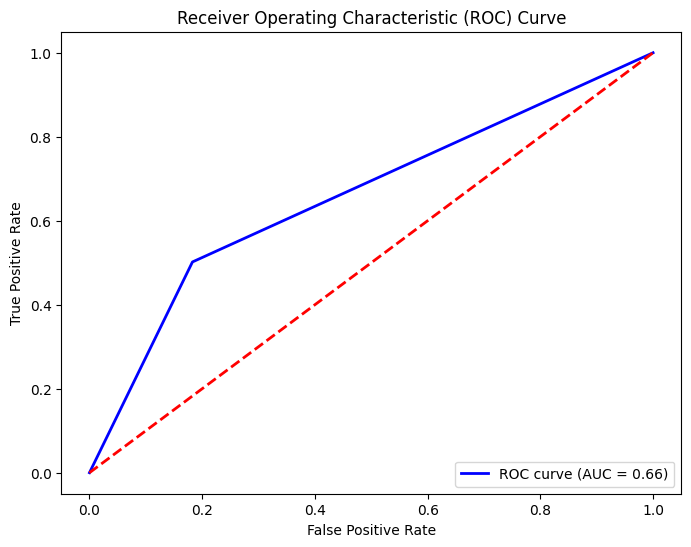

Confusion Matrix:
[[1279  286]
 [ 269  271]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1565
           1       0.49      0.50      0.49       540

    accuracy                           0.74      2105
   macro avg       0.66      0.66      0.66      2105
weighted avg       0.74      0.74      0.74      2105



In [166]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, DecisionTreeClassifier(), 'GAN(whole_data)')

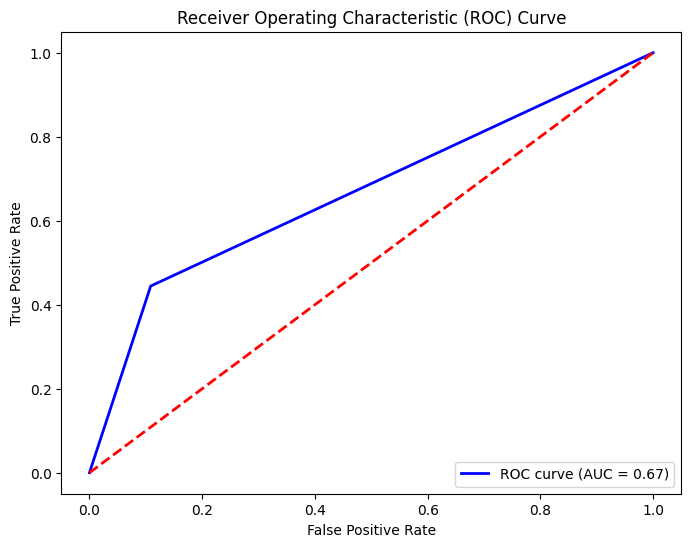

Confusion Matrix:
[[1395  170]
 [ 300  240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1565
           1       0.59      0.44      0.51       540

    accuracy                           0.78      2105
   macro avg       0.70      0.67      0.68      2105
weighted avg       0.76      0.78      0.77      2105



In [167]:
apply_ML_algov2(X_train, y_train, X_test, y_test, RandomForestClassifier(), 'GAN(whole_data)')

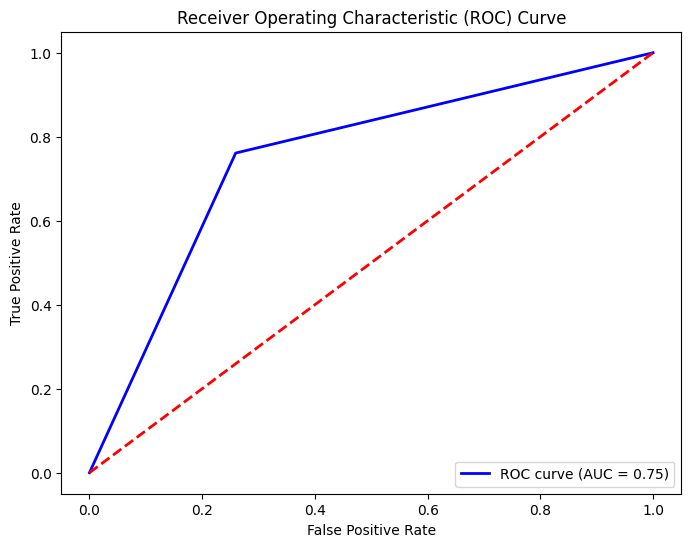

Confusion Matrix:
[[1159  406]
 [ 129  411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1565
           1       0.50      0.76      0.61       540

    accuracy                           0.75      2105
   macro avg       0.70      0.75      0.71      2105
weighted avg       0.80      0.75      0.76      2105



In [168]:
warnings.filterwarnings("ignore")


apply_ML_algov2(X_train, y_train, X_test, y_test, BernoulliNB(), 'GAN(whole_data)')

In [169]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |                 None                  |                              SVC()                               | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |


## Experiment no 11:GAN(train_data)

In [170]:
balanced_df_train=import_dataset(r'/content/balanced_dataset_train.xlsx')

In [171]:

balanced_df_train=dealing_with_duplicates(balanced_df_train)
# Split dataset into train and test
X = balanced_df_train.drop('Churn', axis=1)
y = balanced_df_train['Churn']


value_counts = balanced_df_train['Churn'].value_counts()

# Iterate over each unique category value and print the count
for category, count in value_counts.items():
    print(f"Category value {category}: Number of occurrences: {count}")


Number of duplicate rows in your data set: 2
All the duplicate rows have been deleted from data set
Category value 0: Number of occurrences: 3606
Category value 1: Number of occurrences: 2302


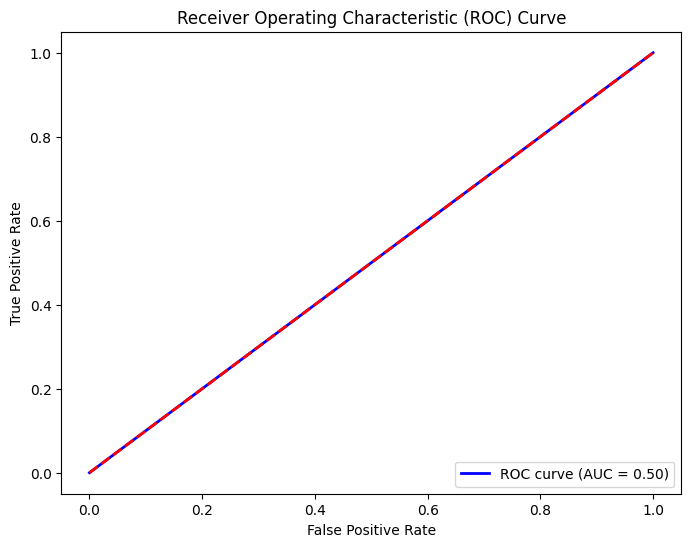

Confusion Matrix:
[[1556    0]
 [ 551    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1556
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2107
   macro avg       0.37      0.50      0.42      2107
weighted avg       0.55      0.74      0.63      2107



In [172]:
apply_ML_algov2(X, y, X1_test, y1_test, LogisticRegression(), 'GAN(train_data)')

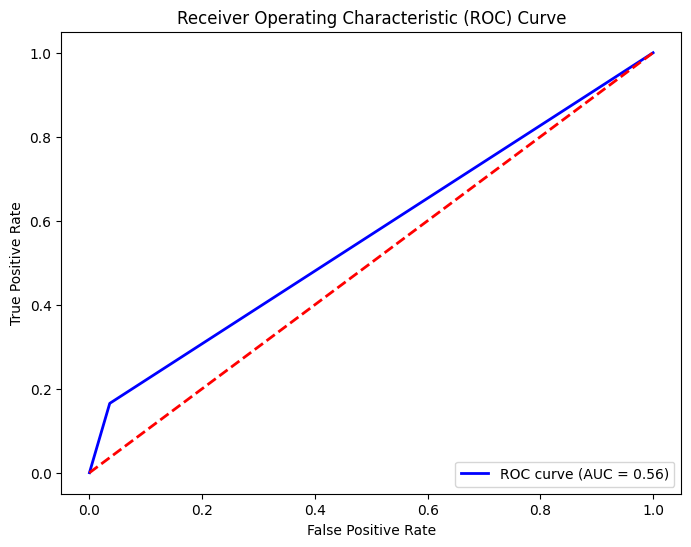

Confusion Matrix:
[[1500   56]
 [ 460   91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1556
           1       0.62      0.17      0.26       551

    accuracy                           0.76      2107
   macro avg       0.69      0.56      0.56      2107
weighted avg       0.73      0.76      0.70      2107



In [173]:
apply_ML_algov2(X, y, X1_test, y1_test, SVC(), 'GAN(train_data)')


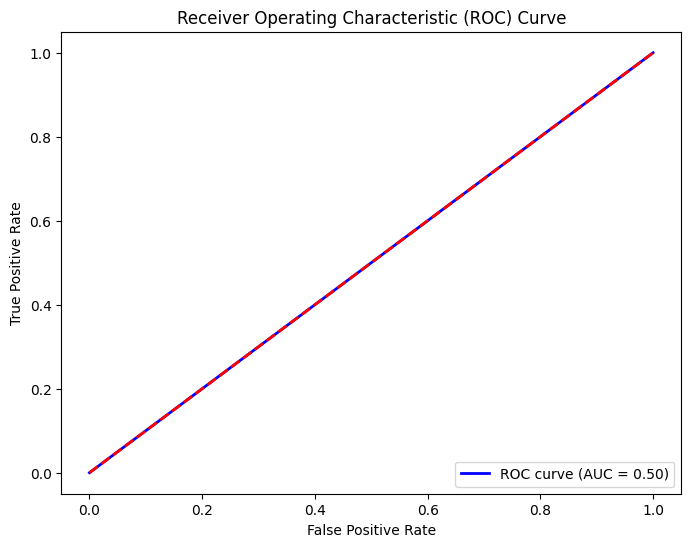

Confusion Matrix:
[[1556    0]
 [ 551    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1556
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2107
   macro avg       0.37      0.50      0.42      2107
weighted avg       0.55      0.74      0.63      2107



In [174]:
apply_ML_algov2(X, y, X1_test, y1_test, DecisionTreeClassifier(), 'GAN(train_data)')


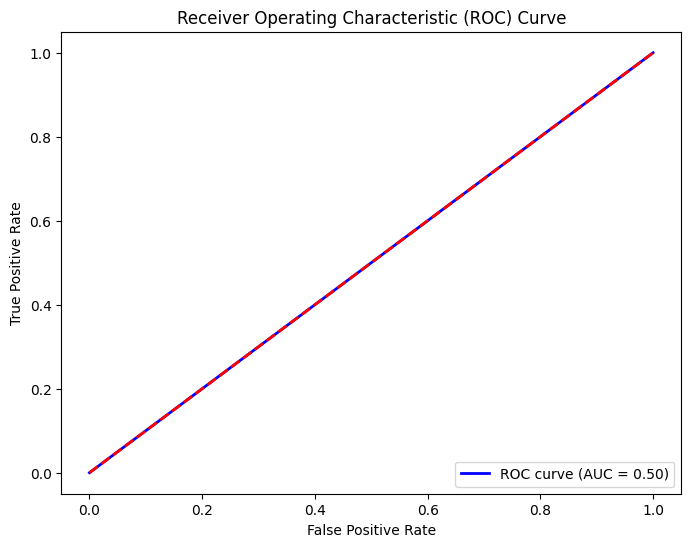

Confusion Matrix:
[[1556    0]
 [ 551    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1556
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2107
   macro avg       0.37      0.50      0.42      2107
weighted avg       0.55      0.74      0.63      2107



In [175]:
apply_ML_algov2(X, y, X1_test, y1_test, RandomForestClassifier(), 'GAN(train_data)')


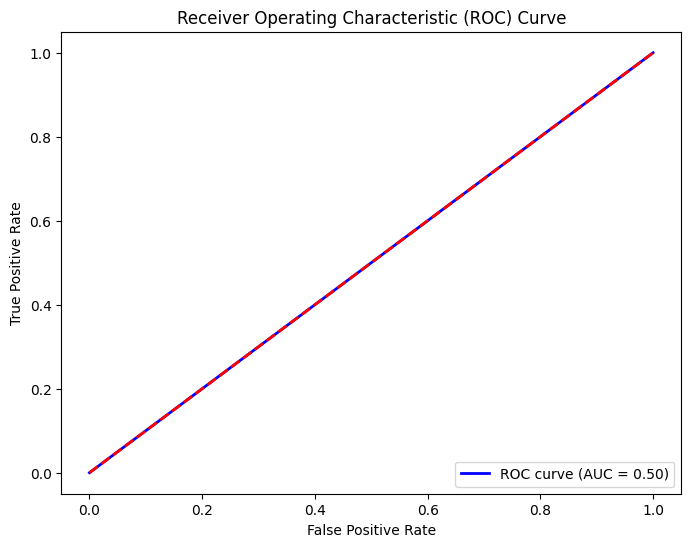

Confusion Matrix:
[[1556    0]
 [ 551    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1556
           1       0.00      0.00      0.00       551

    accuracy                           0.74      2107
   macro avg       0.37      0.50      0.42      2107
weighted avg       0.55      0.74      0.63      2107



In [176]:
apply_ML_algov2(X, y, X1_test, y1_test, BernoulliNB(), 'GAN(train_data)')


In [177]:
print(tabulate(results_df,headers='keys',tablefmt='pretty'))

+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
|    |          Balancing Technique          |                            Model Name                            |      Accuracy      |      Precision      |       Recall        |    AUC_ROCcurve    |
+----+---------------------------------------+------------------------------------------------------------------+--------------------+---------------------+---------------------+--------------------+
| 0  |                 None                  |                       LogisticRegression()                       | 0.8016136687233033 | 0.6388308977035491  | 0.5553539019963702  | 0.7220856913580823 |
| 1  |                 None                  |                              SVC()                               | 0.7816801139060275 | 0.6253443526170799  | 0.41197822141560797 | 0.6622873112219428 |


In [178]:
results_df.to_csv('churn_results.csv', index=False, encoding='utf-8')  # Using UTF-8 encoding saving results as csv file
